In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

In [2]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

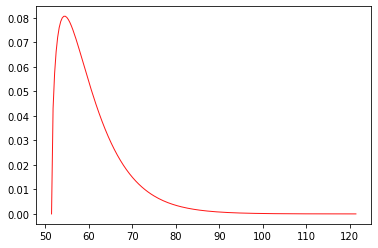

In [3]:
# distribution for the cost of BEP
loc = 51.42
mean = 60.42 - loc
a = 1.5
scale = mean/a
fig, ax = plt.subplots(1,1)
x = np.linspace(loc, loc+(120-50), 200)
ax.plot(x, scipy.stats.gamma.pdf(x, a, loc, scale), 'r-', lw=1, alpha=0.9, label='beta pdf')
plt.show()

In [4]:
%cd '/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/india/2020_09_07_08_30_41'
%ls

/ihme/costeffectiveness/results/vivarium_gates_bep/summer_run3/india/2020_09_07_08_30_41
branches.yaml  keyspace.yaml             output.hdf        settings.py
count_data/    logs/                     __pycache__/
final_data/    model_specification.yaml  requirements.txt


In [5]:
ylls_india_raw =  pd.read_hdf('/share/costeffectiveness/results/vivarium_gates_bep/summer_run1/india/2020_09_04_17_40_19/count_data/ylls.hdf')
ylls_india_raw.head()

,age_group,cause,treatment_group,mother_status,measure,input_draw,scenario,value
0,1_to_4,diarrheal_diseases,bep,malnourished,ylls,3,baseline,0.000000
1,1_to_4,diarrheal_diseases,bep,malnourished,ylls,3,bep_hd_scale_up,260.138002
2,1_to_4,diarrheal_diseases,bep,malnourished,ylls,3,bep_hd_targeted_scale_up,260.138002
3,1_to_4,diarrheal_diseases,bep,malnourished,ylls,3,mmn_scale_up,0.000000
4,1_to_4,diarrheal_diseases,bep,malnourished,ylls,21,baseline,0.000000


In [6]:
# explore scenarios run1 (basdline, mmn, bep_hd_i scenarios)

#SUM YLLS over CAUSE
ylls_india001 = pd.read_hdf('/share/costeffectiveness/results/vivarium_gates_bep/summer_run1/india/2020_09_04_17_40_19/count_data/ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
ylls_india001['scenario'] = ylls_india001['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_i').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_i') 

ylls_india001['scenario'].unique()

array(['baseline', 'bep_hd_scale_up_i', 'bep_hd_targeted_scale_up_i',
       'mmn_scale_up'], dtype=object)

In [7]:
# explore scenarios run2 (ce scenarios)

ylls_india002 = pd.read_hdf('/share/costeffectiveness/results/vivarium_gates_bep/summer_run2/india/2020_09_05_12_05_16/count_data/ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})

ylls_india002['scenario'].unique()


array(['bep_ce_scale_up', 'bep_ce_targeted_scale_up'], dtype=object)

In [8]:
# explore scenarios run3

ylls_india003 = pd.read_hdf('/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/india/2020_09_07_08_30_41/count_data/ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
ylls_india003['scenario']= ylls_india003['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_ii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_ii') 

ylls_india003['scenario'].unique()

array(['bep_hd_scale_up_ii', 'bep_hd_targeted_scale_up_ii'], dtype=object)

In [9]:
# explore scenarios run4

ylls_india004 = pd.read_hdf('/share/costeffectiveness/results/vivarium_gates_bep/summer_run4/india/2020_09_07_08_39_06/count_data/ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
ylls_india004['scenario']= ylls_india004['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_iii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_iii') 

ylls_india004['scenario'].unique()


array(['bep_hd_scale_up_iii', 'bep_hd_targeted_scale_up_iii'],
      dtype=object)

In [10]:
ylls_india = ylls_india001.append([ylls_india002, ylls_india003,ylls_india004])
ylls_india['scenario'].unique()

array(['baseline', 'bep_hd_scale_up_i', 'bep_hd_targeted_scale_up_i',
       'mmn_scale_up', 'bep_ce_scale_up', 'bep_ce_targeted_scale_up',
       'bep_hd_scale_up_ii', 'bep_hd_targeted_scale_up_ii',
       'bep_hd_scale_up_iii', 'bep_hd_targeted_scale_up_iii'],
      dtype=object)

In [11]:
%cd '/share/costeffectiveness/results/vivarium_gates_bep/summer_run2/india'
%ls

/ihme/costeffectiveness/results/vivarium_gates_bep/summer_run2/india
2020_09_05_12_05_16/  fig_DALYS.png


In [12]:
#run1 (baseline, mmn, bep_hd_i-universal & targeted)
#run2 (bep_ce_universal & targeted)
#run3 (baseline, mmn, bep_hd_ii-universal & targeted)
#run4 (baseline, mmn, bep_hd_iii-universal & targeted)

output_dirs001 = ['/share/costeffectiveness/results/vivarium_gates_bep/summer_run1/india/2020_09_04_17_40_19/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run1/pakistan/2020_09_05_11_51_49/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run1/mali/2020_09_04_17_51_31/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run1/tanzania/2020_09_05_11_55_58/count_data/']

output_dirs002 = ['/share/costeffectiveness/results/vivarium_gates_bep/summer_run2/india/2020_09_05_12_05_16/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run2/pakistan/2020_09_07_08_21_34/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run2/mali/2020_09_05_12_09_07/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run2/tanzania/2020_09_07_08_23_52/count_data/']

output_dirs003 = ['/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/india/2020_09_07_08_30_41/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/pakistan/2020_09_07_08_34_30/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/mali/2020_09_07_08_32_30/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/tanzania/2020_09_07_08_36_10/count_data/']

output_dirs004 = ['/share/costeffectiveness/results/vivarium_gates_bep/summer_run4/india/2020_09_07_08_39_06/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run4/pakistan/2020_09_07_08_42_41/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run4/mali/2020_09_07_08_41_07/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run4/tanzania/2020_09_07_08_44_13/count_data/']
#location labels
locations = ['India','Pakistan','Mali','Tanzania']

#use in sort_values to make custum sort list. I sorted by region. 
sorter = ['India','Pakistan','Mali','Tanzania']
sorterIndex = dict(zip(sorter,range(len(sorter))))


# ----------------------------------------------------------------------------------------------
# MASTER_AVG table - table with all desired output variable means
#  ---------------------------------------------------------------------------------------------

In [13]:
# ALL COUNTRIES, run001 and run002 merge (baseline, mmn, bep_scale_up_hd, bep_universal_hd)

master_avg = pd.DataFrame()
master_draws = pd.DataFrame()
master_counts = pd.DataFrame()

for i in list(range(len(output_dirs001))):

  #count data set for ylls
    #run1 bep_hd_i
    ylls_001 = pd.read_hdf(output_dirs001[i] + 'ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
    ylls_001['scenario']= ylls_001['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_i').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_i')
    
    #run2 bep_ce
    ylls_002 = pd.read_hdf(output_dirs002[i] + 'ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
   
    #run3 bep_hd_ii
    ylls_003 = pd.read_hdf(output_dirs003[i] + 'ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
    ylls_003['scenario']= ylls_003['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_ii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_ii')
        
    #run4 bep_hd_iii
    ylls_004 = pd.read_hdf(output_dirs004[i] + 'ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
    ylls_004['scenario']= ylls_004['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_iii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_iii')         
    
    #APPEND ALL
    ylls = ylls_001.append([ylls_002, ylls_003, ylls_004])
    
    #count data set for ylds
    ylds_001 = pd.read_hdf(output_dirs001[i] + 'ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})
    ylds_001['scenario']= ylds_001['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_i').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_i')
    
    ylds_002 = pd.read_hdf(output_dirs002[i] + 'ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})
    
    ylds_003 = pd.read_hdf(output_dirs003[i] + 'ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})
    ylds_003['scenario']= ylds_003['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_ii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_ii')
    
    ylds_004  = pd.read_hdf(output_dirs004[i] + 'ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})
    ylds_004['scenario']= ylds_004['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_iii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_iii')
    
    #APPEND ALL
    ylds = ylds_001.append([ylds_002, ylds_003, ylds_004])
    
    #create DALYs by adding ylls and ylds
    dalys = ylls.merge(ylds, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
    dalys['dalys'] = dalys['ylls'] + dalys['ylds']
    dalys = dalys.drop(columns=['ylls','ylds'])
    
    #count data set for person_time
    person_time_001 = pd.read_hdf(output_dirs001[i] + 'person_time.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'person_time'})
    person_time_001['scenario']= person_time_001['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_i').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_i')
    
    person_time_002 = pd.read_hdf(output_dirs002[i] + 'person_time.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'person_time'})
    
    person_time_003 = pd.read_hdf(output_dirs003[i] + 'person_time.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'person_time'})
    person_time_003['scenario']= person_time_003['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_ii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_ii')
    
    person_time_004 = pd.read_hdf(output_dirs004[i] + 'person_time.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'person_time'})
    person_time_004['scenario']= person_time_004['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_iii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_iii')
    
    person_time = person_time_001.append([person_time_002,person_time_003,person_time_004])
    
    #count data set for population numbers
    treatment_001 = pd.read_hdf(output_dirs001[i] + 'population.hdf').reset_index().groupby(['input_draw','scenario','treatment_group','measure']).sum().reset_index().drop(columns='index').rename(columns={'value':'population'})
    treatment_001['scenario']= treatment_001['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_i').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_i')
    
    treatment_002 = pd.read_hdf(output_dirs002[i] + 'population.hdf').reset_index().groupby(['input_draw','scenario','treatment_group','measure']).sum().reset_index().drop(columns='index').rename(columns={'value':'population'})
    
    treatment_003 = pd.read_hdf(output_dirs003[i] + 'population.hdf').reset_index().groupby(['input_draw','scenario','treatment_group','measure']).sum().reset_index().drop(columns='index').rename(columns={'value':'population'})
    treatment_003['scenario']= treatment_003['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_ii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_ii')
    
    treatment_004 = pd.read_hdf(output_dirs004[i] + 'population.hdf').reset_index().groupby(['input_draw','scenario','treatment_group','measure']).sum().reset_index().drop(columns='index').rename(columns={'value':'population'})
    treatment_004['scenario']= treatment_004['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_iii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_iii')
    
    
    treatment = treatment_001.append([treatment_002,treatment_003,treatment_004])
    
    treatment = treatment.where(treatment['measure'] == 'total_population').dropna()
    treatment = pd.pivot_table(treatment, index=['input_draw','scenario'], columns='treatment_group', values='population').reset_index()
    treatment = treatment.rename(columns={'all':'total_population',
                               'bep':'bep_population',
                               'ifa':'ifa_population',
                               'mmn':'mmn_population',
                               'none':'untreated_population'})
    
    dalys_pt = dalys.merge(person_time, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
    dalys_tot = dalys_pt.merge(treatment, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
    
    #DALYS_TOT TABLE
    count = dalys_tot
    
    #MASTER_COUNTS
    
    count['location'] = locations[i]
    master_counts = master_counts.append(count)
    
    #master_counts consists of columns: 
    # -input_draw
    # -scenarios
    # -dalys
    # -person-time
    # -total_pop
    # -bep_pop
    # -ifa_pop
    # -mmn_pop
    # -untreated_pop

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
# USING DALYS_TOTS, look up scenario names
# dalys_tots['scenario']
#'baseline'
#'mmn_scale_up'
#'bep_ce_scale_up'
#'bep_ce_targeted_scale_up',

#'bep_hd_scale_up_i'
#'bep_hd_scale_up_ii'
#'bep_hd_scale_up_iii'

#'bep_hd_targeted_scale_up_i'     
#'bep_hd_targeted_scale_up_ii'
#'bep_hd_targeted_scale_up_iii'

    # add cost data
    
    
# ---A) COST FOR BASELINE SCENARIO
    
    #1. select for baseline row
    dalys_baseline = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'baseline').dropna().drop(columns='scenario'))
    #2. create cost column
    dalys_baseline['cost'] = 2.69 * dalys_baseline['ifa_population']
    #3. drop person-time
    #dalys_baseline = dalys_baseline.drop(columns='person_time')   #dalys are out of 100,000 births  
    
# ---B) COST FOR MMN SCENARIO
    
    #1. select for mmn row
    dalys_mmn = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'mmn_scale_up').dropna().drop(columns='scenario'))
    
    #2. create cost column
    dalys_mmn['cost'] = 3.69 * dalys_mmn['mmn_population'] 
    
    #3. drop person-time
    dalys_mmn = dalys_mmn.drop(columns='person_time')  #dalys are out of 100,000 births
        
        
# ---C) cost for CE UNIVERSAL SCENARIO (current evidence effect)
    
    #1. select for bep_ce_scale_up (universal) row
    dalys_bep_ce_universal = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_ce_scale_up').dropna().drop(columns='scenario'))
    
    #2. create cost column
    np.random.seed(12345)
    dalys_bep_ce_universal['cost_bep_ce_universal'] =  dalys_bep_ce_universal['bep_population'] * (scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_ce_universal['person_time'])) + 3.69)
    dalys_bep_ce_universal['cost_bep_ce_universal_avg'] = (60.42 + 3.69) *  dalys_bep_ce_universal['bep_population']
    dalys_bep_ce_universal['cost_bep_ce_universal_low'] = (51.42 + 3.69) *  dalys_bep_ce_universal['bep_population'] 
    dalys_bep_ce_universal['cost_bep_ce_universal_high'] = (120.42 + 3.69) *  dalys_bep_ce_universal['bep_population'] 
    
    #3. drop person time, no need for pt
    dalys_bep_ce_universal = dalys_bep_ce_universal.drop(columns='person_time') #dalys are out of 100,000 births
    
    
# ---D) cost for CE TARGETED scenario (current evidence effect)
    
    #1. select for targeted row
    dalys_bep_ce_targeted = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_ce_targeted_scale_up').dropna().drop(columns='scenario'))
    
    #2. create targeted cost column
    np.random.seed(12345)
    dalys_bep_ce_targeted['cost_bep_ce_targeted'] = (dalys_bep_ce_targeted['bep_population'] * (scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_ce_targeted['person_time'])) + 3.69)) +  (dalys_bep_ce_targeted['mmn_population'] * 3.69)
    
    dalys_bep_ce_targeted['cost_bep_ce_targeted_avg'] = ((60.42 + 3.69) * dalys_bep_ce_targeted['bep_population']) + (dalys_bep_ce_targeted['mmn_population'] * 3.69)  
    dalys_bep_ce_targeted['cost_bep_ce_targeted_low'] = ((51.42 + 3.69) * dalys_bep_ce_targeted['bep_population']) +  (dalys_bep_ce_targeted['mmn_population'] * 3.69) 
    dalys_bep_ce_targeted['cost_bep_ce_targeted_high'] = ((120.42 + 3.69) * dalys_bep_ce_targeted['bep_population']) + (dalys_bep_ce_targeted['mmn_population'] * 3.69) 
    #3. drop person time, no need for pt                                    
    dalys_bep_ce_targeted = dalys_bep_ce_targeted.drop(columns='person_time') #dalys are out of 100,000 births
    
# ------------------------ i,ii,ii -------------------------

    # ---E) COST FOR HD universal SCENARIO (hopes and dreams effect, with f only)
    
#i  1. select for bep hd universal row i
    dalys_bep_hd_universal_i = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_hd_scale_up_i').dropna().drop(columns='scenario'))
    
    #2. create cost column
    np.random.seed(12345)
    dalys_bep_hd_universal_i['cost_bep_hd_universal_i'] =  dalys_bep_hd_universal_i['bep_population'] * (scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_hd_universal_i['person_time'])) + 3.69)
    dalys_bep_hd_universal_i['cost_bep_hd_universal_avg_i'] = (60.42 + 3.69) *  dalys_bep_hd_universal_i['bep_population']
    dalys_bep_hd_universal_i['cost_bep_hd_universal_low_i'] = (51.42 + 3.69) *  dalys_bep_hd_universal_i['bep_population'] 
    dalys_bep_hd_universal_i['cost_bep_hd_universal_high_i'] = (120.42 + 3.69) *  dalys_bep_hd_universal_i['bep_population'] 
    
    #3. drop person time, no need for pt
    dalys_bep_hd_universal_i =  dalys_bep_hd_universal_i.drop(columns='person_time') #dalys are out of 100,000 births
    
#ii 1. select for bep hd universal row ii
    dalys_bep_hd_universal_ii = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_hd_scale_up_ii').dropna().drop(columns='scenario'))
    
    #2. create cost column
    np.random.seed(12345)
    dalys_bep_hd_universal_ii['cost_bep_hd_universal_ii'] =  dalys_bep_hd_universal_ii['bep_population'] * (scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_hd_universal_ii['person_time'])) + 3.69)
    dalys_bep_hd_universal_ii['cost_bep_hd_universal_avg_ii'] = (60.42 + 3.69) * dalys_bep_hd_universal_ii['bep_population']
    dalys_bep_hd_universal_ii['cost_bep_hd_universal_low_ii'] = (51.42 + 3.69) * dalys_bep_hd_universal_ii['bep_population'] 
    dalys_bep_hd_universal_ii['cost_bep_hd_universal_high_ii'] = (120.42 + 3.69) * dalys_bep_hd_universal_ii['bep_population'] 
    
    #3. drop person time, no need for pt
    dalys_bep_hd_universal_ii =  dalys_bep_hd_universal_ii.drop(columns='person_time') #dalys are out of 100,000 births
    
#iii 1. select for bep hd universal row iii
    dalys_bep_hd_universal_iii = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_hd_scale_up_iii').dropna().drop(columns='scenario'))
    
    #2. create cost column
    np.random.seed(12345)
    dalys_bep_hd_universal_iii['cost_bep_hd_universal_iii'] =  dalys_bep_hd_universal_iii['bep_population'] * (scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_hd_universal_iii['person_time']))+ 3.69)
    dalys_bep_hd_universal_iii['cost_bep_hd_universal_avg_iii'] = (60.42 + 3.69) *  dalys_bep_hd_universal_iii['bep_population']
    dalys_bep_hd_universal_iii['cost_bep_hd_universal_low_iii'] = (51.42 + 3.69) *  dalys_bep_hd_universal_iii['bep_population'] 
    dalys_bep_hd_universal_iii['cost_bep_hd_universal_high_iii'] = (120.42 + 3.69) *  dalys_bep_hd_universal_iii['bep_population'] 
    
    #3. drop person time, no need for pt
    dalys_bep_hd_universal_iii =  dalys_bep_hd_universal_iii.drop(columns='person_time') #dalys are out of 100,000 births
    
      
    # ---F) cost for HD TARGETED scenarios (hopes and dreams effect, i,ii,iii)
    
#i  1. select for targeted row
    dalys_bep_hd_targeted_i = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_hd_targeted_scale_up_i').dropna().drop(columns='scenario'))
    
    #2. create targeted cost column for hd
    np.random.seed(12345)
    dalys_bep_hd_targeted_i['cost_bep_hd_targeted_i'] = (dalys_bep_hd_targeted_i['bep_population'] * (scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_hd_targeted_i['person_time'])) + 3.69)) + (dalys_bep_hd_targeted_i['mmn_population'] * 3.69)
    dalys_bep_hd_targeted_i['cost_bep_hd_targeted_avg_i'] = ((60.42 + 3.69) * dalys_bep_hd_targeted_i['bep_population']) + (dalys_bep_hd_targeted_i['mmn_population'] * 3.69)  
    dalys_bep_hd_targeted_i['cost_bep_hd_targeted_low_i'] = ((60.42 + 3.69) * dalys_bep_hd_targeted_i['bep_population']) + (dalys_bep_hd_targeted_i['mmn_population'] * 3.69) 
    dalys_bep_hd_targeted_i['cost_bep_hd_targeted_high_i'] = ((60.42 + 3.69) * dalys_bep_hd_targeted_i['bep_population']) + (dalys_bep_hd_targeted_i['mmn_population'] * 3.69) 

    #3. drop person time, no need for pt                                    
    dalys_bep_hd_targeted_i = dalys_bep_hd_targeted_i.drop(columns='person_time') #dalys are out of 100,000 births
    
#ii 1. select for targeted row
    dalys_bep_hd_targeted_ii = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_hd_targeted_scale_up_ii').dropna().drop(columns='scenario'))
    
    #2. create targeted cost column for hd
    np.random.seed(12345)
    dalys_bep_hd_targeted_ii['cost_bep_hd_targeted_ii'] = (dalys_bep_hd_targeted_ii['bep_population'] * (scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_hd_targeted_ii['person_time'])) + 3.69)) + (dalys_bep_hd_targeted_ii['mmn_population'] * 3.69)
    dalys_bep_hd_targeted_ii['cost_bep_hd_targeted_avg_ii'] = ((60.42 + 3.69) * dalys_bep_hd_targeted_ii['bep_population']) + (dalys_bep_hd_targeted_ii['mmn_population'] * 3.69)  
    dalys_bep_hd_targeted_ii['cost_bep_hd_targeted_low_ii'] = ((60.42 + 3.69) * dalys_bep_hd_targeted_ii['bep_population']) + (dalys_bep_hd_targeted_ii['mmn_population'] * 3.69) 
    dalys_bep_hd_targeted_ii['cost_bep_hd_targeted_high_ii'] = ((60.42 + 3.69) * dalys_bep_hd_targeted_ii['bep_population']) + (dalys_bep_hd_targeted_ii['mmn_population'] * 3.69) 

    #3. drop person time, no need for pt                                    
    dalys_bep_hd_targeted_ii = dalys_bep_hd_targeted_ii.drop(columns='person_time') #dalys are out of 100,000 births
        
#iii1. select for targeted row
    dalys_bep_hd_targeted_iii = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_hd_targeted_scale_up_iii').dropna().drop(columns='scenario'))
    
    #2. create targeted cost column for hd
    np.random.seed(12345)
    dalys_bep_hd_targeted_iii['cost_bep_hd_targeted_iii'] = (dalys_bep_hd_targeted_iii['bep_population'] * (scipy.stats.gamma.rvs(a, loc, scale, size=len(dalys_bep_hd_targeted_iii['person_time'])) + 3.69)) + (dalys_bep_hd_targeted_iii['mmn_population'] * 3.69)
    dalys_bep_hd_targeted_iii['cost_bep_hd_targeted_avg_iii'] = ((60.42 + 3.69) * dalys_bep_hd_targeted_iii['bep_population']) + (dalys_bep_hd_targeted_iii['mmn_population'] * 3.69)  
    dalys_bep_hd_targeted_iii['cost_bep_hd_targeted_low_iii'] = ((60.42 + 3.69) * dalys_bep_hd_targeted_iii['bep_population']) + (dalys_bep_hd_targeted_iii['mmn_population'] * 3.69) 
    dalys_bep_hd_targeted_iii['cost_bep_hd_targeted_high_iii'] = ((60.42 + 3.69) * dalys_bep_hd_targeted_iii['bep_population']) + (dalys_bep_hd_targeted_iii['mmn_population'] * 3.69) 

    #3. drop person time, no need for pt                                    
    dalys_bep_hd_targeted_iii = dalys_bep_hd_targeted_iii.drop(columns='person_time') #dalys are out of 100,000 births
        
        
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
    
    # merging the cost tables back together                                                
    #scenario 1 is baseline
    dalys_scenariosB = dalys_baseline.merge(dalys_mmn, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_mmn']) #mmn
    dalys_scenariosC = dalys_baseline.merge(dalys_bep_ce_universal, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_ce_universal']) #bep current evidence universal bep_ce
    dalys_scenariosD = dalys_baseline.merge(dalys_bep_ce_targeted, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_ce_targeted'])
    
    dalys_scenariosEi = dalys_baseline.merge(dalys_bep_hd_universal_i, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_hd_universal_i'])
    dalys_scenariosEii = dalys_baseline.merge(dalys_bep_hd_universal_ii, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_hd_universal_ii'])
    dalys_scenariosEiii = dalys_baseline.merge(dalys_bep_hd_universal_iii, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_hd_universal_iii'])
    
    dalys_scenariosFi = dalys_baseline.merge(dalys_bep_hd_targeted_i, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_hd_targeted_i'])
    dalys_scenariosFii = dalys_baseline.merge(dalys_bep_hd_targeted_ii, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_hd_targeted_ii'])
    dalys_scenariosFiii = dalys_baseline.merge(dalys_bep_hd_targeted_iii, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_hd_targeted_iii'])
   
    dalys_scenarios1  = dalys_scenariosB.merge(dalys_scenariosC, right_on=['input_draw'], left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios2  = dalys_scenariosD.merge(dalys_scenarios1, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios3  = dalys_scenariosEi.merge(dalys_scenarios2, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios4  = dalys_scenariosEii.merge(dalys_scenarios3, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios5  = dalys_scenariosEiii.merge(dalys_scenarios4, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios6  = dalys_scenariosFi.merge(dalys_scenarios5, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios7  = dalys_scenariosFii.merge(dalys_scenarios6, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios   = dalys_scenariosFiii.merge(dalys_scenarios7, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    
    dalys_scenarios  = dalys_scenarios.drop(columns=[c for c in dalys_scenarios.columns if 'drop' in c])
    
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
   
    #calculating DALYs averted and cost diff relative to BASELINE
    
    #-------- RELATIVE TO BASELINE ---------#
    
    # B: mmn vs baseline
    dalys_scenarios['dalys_averted_mmn'] = dalys_scenarios['dalys_mmn'] - dalys_scenarios['dalys_baseline']
    dalys_scenarios['cost_diff_mmn'] = dalys_scenarios['cost_mmn'] - dalys_scenarios['cost_baseline']
    
    #  C: bep ce_universal vs baseline
    dalys_scenarios['dalys_averted_bep_ce_universal'] = dalys_scenarios['dalys_bep_ce_universal'] - dalys_scenarios['dalys_baseline'] #dalys_bep_ce_universal
    dalys_scenarios['cost_diff_bep_ce_universal'] = dalys_scenarios['cost_bep_ce_universal'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_universal_avg'] = dalys_scenarios['cost_bep_ce_universal_avg'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_universal_low'] = dalys_scenarios['cost_bep_ce_universal_low'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_universal_high'] = dalys_scenarios['cost_bep_ce_universal_high'] - dalys_scenarios['cost_baseline']
    
    #  D: bep ce_targeted vs baseline
    dalys_scenarios['dalys_averted_bep_ce_targeted'] = dalys_scenarios['dalys_bep_ce_targeted'] - dalys_scenarios['dalys_baseline'] #dalys_bep_ce_targeted 
    dalys_scenarios['cost_diff_bep_ce_targeted'] = dalys_scenarios['cost_bep_ce_targeted'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_targeted_low'] = dalys_scenarios['cost_bep_ce_targeted_low'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_targeted_high'] = dalys_scenarios['cost_bep_ce_targeted_high'] - dalys_scenarios['cost_baseline']
    
    #  Ei: bep hd_universal vs baseline 
    dalys_scenarios['dalys_averted_bep_hd_universal_i'] = dalys_scenarios['dalys_bep_hd_universal_i'] - dalys_scenarios['dalys_baseline']  #dalys_bep_hd_universal_i
    dalys_scenarios['cost_diff_bep_hd_universal_i'] = dalys_scenarios['cost_bep_hd_universal_i'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_avg_i'] = dalys_scenarios['cost_bep_hd_universal_avg_i'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_low_i'] = dalys_scenarios['cost_bep_hd_universal_low_i'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_high_i'] = dalys_scenarios['cost_bep_hd_universal_high_i'] - dalys_scenarios['cost_baseline']
    
     #  Eii: bep hd_universal vs baseline 
    dalys_scenarios['dalys_averted_bep_hd_universal_ii'] = dalys_scenarios['dalys_bep_hd_universal_ii'] - dalys_scenarios['dalys_baseline']  #dalys_bep_hd_universal_ii
    dalys_scenarios['cost_diff_bep_hd_universal_ii'] = dalys_scenarios['cost_bep_hd_universal_ii'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_avg_ii'] = dalys_scenarios['cost_bep_hd_universal_avg_ii'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_low_ii'] = dalys_scenarios['cost_bep_hd_universal_low_ii'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_high_ii'] = dalys_scenarios['cost_bep_hd_universal_high_ii'] - dalys_scenarios['cost_baseline']
    
    #  Eiii: bep hd_universal vs baseline 
    dalys_scenarios['dalys_averted_bep_hd_universal_iii'] = dalys_scenarios['dalys_bep_hd_universal_iii'] - dalys_scenarios['dalys_baseline']  #dalys_bep_hd_universal_iii
    dalys_scenarios['cost_diff_bep_hd_universal_iii'] = dalys_scenarios['cost_bep_hd_universal_iii'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_avg_iii'] = dalys_scenarios['cost_bep_hd_universal_avg_iii'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_low_iii'] = dalys_scenarios['cost_bep_hd_universal_low_iii'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_high_iii'] = dalys_scenarios['cost_bep_hd_universal_high_iii'] - dalys_scenarios['cost_baseline']
    
    
    #  Fi: bep hd_targeted vs baseline
    dalys_scenarios['dalys_averted_bep_hd_targeted_i'] = dalys_scenarios['dalys_bep_hd_targeted_i'] - dalys_scenarios['dalys_baseline']  #dalys_bep_hd_targeted_i
    dalys_scenarios['cost_diff_bep_hd_targeted_i'] = dalys_scenarios['cost_bep_hd_targeted_i'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_targeted_low_i'] = dalys_scenarios['cost_bep_hd_targeted_low_i'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_targeted_high_i'] = dalys_scenarios['cost_bep_hd_targeted_high_i'] - dalys_scenarios['cost_baseline']
    
    #  Fii: bep hd_targeted vs baseline
    dalys_scenarios['dalys_averted_bep_hd_targeted_ii'] = dalys_scenarios['dalys_bep_hd_targeted_ii'] - dalys_scenarios['dalys_baseline']  #dalys_bep_hd_targeted_ii
    dalys_scenarios['cost_diff_bep_hd_targeted_ii'] = dalys_scenarios['cost_bep_hd_targeted_ii'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_targeted_low_ii'] = dalys_scenarios['cost_bep_hd_targeted_low_ii'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_targeted_high_ii'] = dalys_scenarios['cost_bep_hd_targeted_high_ii'] - dalys_scenarios['cost_baseline']
    
    #  Fiii: bep hd_targeted vs baseline
    dalys_scenarios['dalys_averted_bep_hd_targeted_iii'] = dalys_scenarios['dalys_bep_hd_targeted_iii'] - dalys_scenarios['dalys_baseline']  #dalys_bep_hd_targeted_iii
    dalys_scenarios['cost_diff_bep_hd_targeted_iii'] = dalys_scenarios['cost_bep_hd_targeted_iii'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_targeted_low_iii'] = dalys_scenarios['cost_bep_hd_targeted_low_iii'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_targeted_high_iii'] = dalys_scenarios['cost_bep_hd_targeted_high_iii'] - dalys_scenarios['cost_baseline']
    
    #-------- RELATIVE TO MMN ---------#
    
    # C and E: bep ce/hd UNIVERSAL relative to mmn
    dalys_scenarios['dalys_averted_bep_ce_universal_rel_to_mmn'] = dalys_scenarios['dalys_bep_ce_universal'] - dalys_scenarios['dalys_mmn']
    dalys_scenarios['cost_diff_bep_ce_universal_rel_to_mmn'] = dalys_scenarios['cost_bep_ce_universal'] - dalys_scenarios['cost_mmn']
    
    dalys_scenarios['dalys_averted_bep_hd_universal_rel_to_mmn_i'] = dalys_scenarios['dalys_bep_hd_universal_i'] - dalys_scenarios['dalys_mmn']
    dalys_scenarios['dalys_averted_bep_hd_universal_rel_to_mmn_ii'] = dalys_scenarios['dalys_bep_hd_universal_ii'] - dalys_scenarios['dalys_mmn']
    dalys_scenarios['dalys_averted_bep_hd_universal_rel_to_mmn_iii'] = dalys_scenarios['dalys_bep_hd_universal_iii'] - dalys_scenarios['dalys_mmn']
    
    dalys_scenarios['cost_diff_bep_hd_universal_rel_to_mmn_i'] = dalys_scenarios['cost_bep_hd_universal_i'] - dalys_scenarios['cost_mmn']
    dalys_scenarios['cost_diff_bep_hd_universal_rel_to_mmn_ii'] = dalys_scenarios['cost_bep_hd_universal_ii'] - dalys_scenarios['cost_mmn']
    dalys_scenarios['cost_diff_bep_hd_universal_rel_to_mmn_iii'] = dalys_scenarios['cost_bep_hd_universal_iii'] - dalys_scenarios['cost_mmn']
    
    # D and F: bep ce/hd TARGETED relative to mmn
    dalys_scenarios['dalys_averted_bep_ce_targeted_rel_to_mmn'] = dalys_scenarios['dalys_bep_ce_targeted'] - dalys_scenarios['dalys_mmn']
    dalys_scenarios['cost_diff_bep_ce_targeted_rel_to_mmn'] = dalys_scenarios['cost_bep_ce_targeted'] - dalys_scenarios['cost_mmn']
    
    dalys_scenarios['dalys_averted_bep_hd_targeted_rel_to_mmn_i'] = dalys_scenarios['dalys_bep_hd_targeted_i'] - dalys_scenarios['dalys_mmn']
    dalys_scenarios['dalys_averted_bep_hd_targeted_rel_to_mmn_ii'] = dalys_scenarios['dalys_bep_hd_targeted_ii'] - dalys_scenarios['dalys_mmn']
    dalys_scenarios['dalys_averted_bep_hd_targeted_rel_to_mmn_iii'] = dalys_scenarios['dalys_bep_hd_targeted_iii'] - dalys_scenarios['dalys_mmn']
       
    dalys_scenarios['cost_diff_bep_hd_targeted_rel_to_mmn_i'] = dalys_scenarios['cost_bep_hd_targeted_i'] - dalys_scenarios['cost_mmn']
    dalys_scenarios['cost_diff_bep_hd_targeted_rel_to_mmn_ii'] = dalys_scenarios['cost_bep_hd_targeted_ii'] - dalys_scenarios['cost_mmn']
    dalys_scenarios['cost_diff_bep_hd_targeted_rel_to_mmn_iii'] = dalys_scenarios['cost_bep_hd_targeted_iii'] - dalys_scenarios['cost_mmn']

    
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
   
    #ICER REL TO BASELINE
    
    
    dalys_scenarios['icer_mmn'] = dalys_scenarios['cost_diff_mmn'] / dalys_scenarios['dalys_averted_mmn']
    
    # _ce_universal
    dalys_scenarios['icer_bep_ce_universal'] = dalys_scenarios['cost_diff_bep_ce_universal'] / dalys_scenarios['dalys_averted_bep_ce_universal']
    dalys_scenarios['icer_bep_ce_universal_low'] = dalys_scenarios['cost_diff_bep_ce_universal_low'] / dalys_scenarios['dalys_averted_bep_ce_universal']
    dalys_scenarios['icer_bep_ce_universal_high'] = dalys_scenarios['cost_diff_bep_ce_universal_high'] / dalys_scenarios['dalys_averted_bep_ce_universal']
    
    # _ce_targeted
    dalys_scenarios['icer_bep_ce_targeted'] = dalys_scenarios['cost_diff_bep_ce_targeted'] / dalys_scenarios['dalys_averted_bep_ce_targeted']
    dalys_scenarios['icer_bep_ce_targeted_low'] = dalys_scenarios['cost_diff_bep_ce_targeted_low'] / dalys_scenarios['dalys_averted_bep_ce_targeted']
    dalys_scenarios['icer_bep_ce_targeted_high'] = dalys_scenarios['cost_diff_bep_ce_targeted_high'] / dalys_scenarios['dalys_averted_bep_ce_targeted']
    
    # _hd_universal_i
    dalys_scenarios['icer_bep_hd_universal_i'] = dalys_scenarios['cost_diff_bep_hd_universal_i'] / dalys_scenarios['dalys_averted_bep_hd_universal_i']
    dalys_scenarios['icer_bep_hd_universal_low_i'] = dalys_scenarios['cost_diff_bep_hd_universal_low_i'] / dalys_scenarios['dalys_averted_bep_hd_universal_i']
    dalys_scenarios['icer_bep_hd_universal_high_i'] = dalys_scenarios['cost_diff_bep_hd_universal_high_i'] / dalys_scenarios['dalys_averted_bep_hd_universal_i']
    
    # _hd_universal_ii
    dalys_scenarios['icer_bep_hd_universal_ii'] = dalys_scenarios['cost_diff_bep_hd_universal_ii'] / dalys_scenarios['dalys_averted_bep_hd_universal_ii']
    dalys_scenarios['icer_bep_hd_universal_low_ii'] = dalys_scenarios['cost_diff_bep_hd_universal_low_ii'] / dalys_scenarios['dalys_averted_bep_hd_universal_ii']
    dalys_scenarios['icer_bep_hd_universal_high_ii'] = dalys_scenarios['cost_diff_bep_hd_universal_high_ii'] / dalys_scenarios['dalys_averted_bep_hd_universal_ii']
    
    # _hd_universal_iii
    dalys_scenarios['icer_bep_hd_universal_iii'] = dalys_scenarios['cost_diff_bep_hd_universal_iii'] / dalys_scenarios['dalys_averted_bep_hd_universal_iii']
    dalys_scenarios['icer_bep_hd_universal_low_iii'] = dalys_scenarios['cost_diff_bep_hd_universal_low_iii'] / dalys_scenarios['dalys_averted_bep_hd_universal_iii']
    dalys_scenarios['icer_bep_hd_universal_high_iii'] = dalys_scenarios['cost_diff_bep_hd_universal_high_iii'] / dalys_scenarios['dalys_averted_bep_hd_universal_iii']
    
    
    # _hd_targeted_i
    dalys_scenarios['icer_bep_hd_targeted_i'] = dalys_scenarios['cost_diff_bep_hd_targeted_i'] / dalys_scenarios['dalys_averted_bep_hd_targeted_i']
    dalys_scenarios['icer_bep_hd_targeted_low_i'] = dalys_scenarios['cost_diff_bep_hd_targeted_low_i'] / dalys_scenarios['dalys_averted_bep_hd_targeted_i']
    dalys_scenarios['icer_bep_hd_targeted_high_i'] = dalys_scenarios['cost_diff_bep_hd_targeted_high_i'] / dalys_scenarios['dalys_averted_bep_hd_targeted_i']
    
    # _hd_targeted_ii
    dalys_scenarios['icer_bep_hd_targeted_ii'] = dalys_scenarios['cost_diff_bep_hd_targeted_ii'] / dalys_scenarios['dalys_averted_bep_hd_targeted_ii']
    dalys_scenarios['icer_bep_hd_targeted_low_ii'] = dalys_scenarios['cost_diff_bep_hd_targeted_low_ii'] / dalys_scenarios['dalys_averted_bep_hd_targeted_ii']
    dalys_scenarios['icer_bep_hd_targeted_high_ii'] = dalys_scenarios['cost_diff_bep_hd_targeted_high_ii'] / dalys_scenarios['dalys_averted_bep_hd_targeted_ii']
    
    # _hd_targeted_iii
    dalys_scenarios['icer_bep_hd_targeted_iii'] = dalys_scenarios['cost_diff_bep_hd_targeted_iii'] / dalys_scenarios['dalys_averted_bep_hd_targeted_iii']
    dalys_scenarios['icer_bep_hd_targeted_low_iii'] = dalys_scenarios['cost_diff_bep_hd_targeted_low_iii'] / dalys_scenarios['dalys_averted_bep_hd_targeted_iii']
    dalys_scenarios['icer_bep_hd_targeted_high_iii'] = dalys_scenarios['cost_diff_bep_hd_targeted_high_iii'] / dalys_scenarios['dalys_averted_bep_hd_targeted_iii']
    
    
    #ICER REL TO MMN
        
    #  _ce_universal
    dalys_scenarios['icer_bep_ce_universal_rel_to_mmn'] = dalys_scenarios['cost_diff_bep_ce_universal_rel_to_mmn'] / dalys_scenarios['dalys_averted_bep_ce_universal_rel_to_mmn']
    
    # _ce_targeted
    dalys_scenarios['icer_bep_ce_targeted_rel_to_mmn'] = dalys_scenarios['cost_diff_bep_ce_targeted_rel_to_mmn'] / dalys_scenarios['dalys_averted_bep_ce_targeted_rel_to_mmn']
    
    # _hd_universal_i
    dalys_scenarios['icer_bep_hd_universal_rel_to_mmn_i'] = dalys_scenarios['cost_diff_bep_hd_universal_rel_to_mmn_i'] / dalys_scenarios['dalys_averted_bep_hd_universal_rel_to_mmn_i']
    
    # _hd_universal_ii
    dalys_scenarios['icer_bep_hd_universal_rel_to_mmn_ii'] = dalys_scenarios['cost_diff_bep_hd_universal_rel_to_mmn_ii'] / dalys_scenarios['dalys_averted_bep_hd_universal_rel_to_mmn_ii']
    
    # _hd_universal_iii
    dalys_scenarios['icer_bep_hd_universal_rel_to_mmn_iii'] = dalys_scenarios['cost_diff_bep_hd_universal_rel_to_mmn_iii'] / dalys_scenarios['dalys_averted_bep_hd_universal_rel_to_mmn_iii']
    
    # _hd_targeted_i
    dalys_scenarios['icer_bep_hd_targeted_rel_to_mmn_i'] = dalys_scenarios['cost_diff_bep_hd_targeted_rel_to_mmn_i'] / dalys_scenarios['dalys_averted_bep_hd_targeted_rel_to_mmn_i']
    
    # _hd_targeted_ii
    dalys_scenarios['icer_bep_hd_targeted_rel_to_mmn_ii'] = dalys_scenarios['cost_diff_bep_hd_targeted_rel_to_mmn_ii'] / dalys_scenarios['dalys_averted_bep_hd_targeted_rel_to_mmn_ii']
    
    # _hd_targeted_iii
    dalys_scenarios['icer_bep_hd_targeted_rel_to_mmn_iii'] = dalys_scenarios['cost_diff_bep_hd_targeted_rel_to_mmn_iii'] / dalys_scenarios['dalys_averted_bep_hd_targeted_rel_to_mmn_iii']
    
    dalys_scenarios = dalys_scenarios.set_index(['input_draw'])
    dalys_scenarios['location'] = locations[i]
    
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#  
    #appending each country (dalys_scenarios) together to create master_draws (keep master draws as is)
    
    master_draws = master_draws.append(dalys_scenarios.reset_index())

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
  # USING DALYS_SCENARIOS  
    
    #per country 
    dalys_prep = dalys_scenarios.reset_index().drop(columns=['input_draw','person_time']) #no need for person time, drop
    
    #averaging over the 50 draws
    dalys_mean = pd.DataFrame(dalys_prep.mean()) #mean over all 50 input draw rows
    dalys_min = pd.DataFrame(dalys_prep.quantile(0.025))
    dalys_max = pd.DataFrame(dalys_prep.quantile(0.975))
    
    per_pt1 = dalys_mean.merge(dalys_min, right_index=True, left_index=True)
    #per_pt2 = dalys_mean.merge(dalys_max, right_index=True, left_index=True)
    
    final_per_pt = per_pt1.merge(dalys_max, right_index=True, left_index=True)#, suffixes=['','_drop'])
    final_per_pt = final_per_pt.rename(columns={0.0:'mean', 0.025:'min', 0.975:'max'})#.drop(columns='0.0_mean_drop')
    final_per_pt = final_per_pt.reset_index()
    
    final_per_pt['location'] = locations[i]
    
  #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
    #appending all 4 countries    
    master_avg = master_avg.append(final_per_pt)
  #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
    
# perform lexicographic sort on a dataframe  
master_avg['location_rank'] = master_avg['location'].map(sorterIndex)
master_avg = master_avg.sort_values(by='location_rank')

#master_avg.drop('location_rank', 1, inplace = True)
master_avg.head()
    

,index,mean,min,max,location,location_rank
0,dalys_baseline,3.178823e+05,2.992857e+05,3.368723e+05,India,0
116,dalys_averted_bep_hd_universal_iii,-3.687844e+04,-4.432470e+04,-2.977988e+04,India,0
117,cost_diff_bep_hd_universal_iii,5.087500e+06,4.374892e+06,6.786065e+06,India,0
118,cost_diff_bep_hd_universal_avg_iii,4.999784e+06,4.950958e+06,5.053882e+06,India,0
119,cost_diff_bep_hd_universal_low_iii,4.285044e+06,4.243726e+06,4.331776e+06,India,0


In [14]:
master_avg['index'].unique()

array(['dalys_baseline', 'dalys_averted_bep_hd_universal_iii',
       'cost_diff_bep_hd_universal_iii',
       'cost_diff_bep_hd_universal_avg_iii',
       'cost_diff_bep_hd_universal_low_iii',
       'cost_diff_bep_hd_universal_high_iii',
       'dalys_averted_bep_hd_targeted_i', 'cost_diff_bep_hd_targeted_i',
       'cost_diff_bep_hd_targeted_low_i',
       'cost_diff_bep_hd_targeted_high_i',
       'dalys_averted_bep_hd_targeted_ii', 'cost_diff_bep_hd_targeted_ii',
       'cost_diff_bep_hd_targeted_low_ii',
       'cost_diff_bep_hd_targeted_high_ii',
       'dalys_averted_bep_hd_targeted_iii',
       'cost_diff_bep_hd_targeted_iii',
       'cost_diff_bep_hd_targeted_low_iii',
       'cost_diff_bep_hd_targeted_high_iii',
       'dalys_averted_bep_ce_universal_rel_to_mmn',
       'cost_diff_bep_ce_universal_rel_to_mmn',
       'cost_diff_bep_hd_universal_high_ii',
       'dalys_averted_bep_hd_universal_rel_to_mmn_ii',
       'cost_diff_bep_hd_universal_low_ii',
       'cost_diff_bep_h

In [15]:
dalys_tot['scenario'].unique()

array(['baseline', 'bep_hd_scale_up_i', 'bep_hd_targeted_scale_up_i',
       'mmn_scale_up', 'bep_ce_scale_up', 'bep_ce_targeted_scale_up',
       'bep_hd_scale_up_ii', 'bep_hd_targeted_scale_up_ii',
       'bep_hd_scale_up_iii', 'bep_hd_targeted_scale_up_iii'],
      dtype=object)

# ===================================================

# MASTER_DRAWS with draw-level data points for GG plotting

# ===================================================

In [16]:
# CHECK OUT MASTER DRAWS

# master_draws_t = master_draws.T
master_draws.to_csv('/homes/nicoly/bep_results_data/ouputs_bydraws.csv', index=False)
# master_draws_t.to_csv('/homes/nicoly/bep_results_data/ouputs_bydraws_t.csv', index=False)

# master_draws_t.head()

# TESTING AND EXPLORING DATA



In [17]:
master_avg_india = master_avg.where(master_avg['location'] == 'India').dropna()
master_avg_india

,index,mean,min,max,location,location_rank
0,dalys_baseline,3.178823e+05,2.992857e+05,3.368723e+05,India,0.0
116,dalys_averted_bep_hd_universal_iii,-3.687844e+04,-4.432470e+04,-2.977988e+04,India,0.0
117,cost_diff_bep_hd_universal_iii,5.087500e+06,4.374892e+06,6.786065e+06,India,0.0
118,cost_diff_bep_hd_universal_avg_iii,4.999784e+06,4.950958e+06,5.053882e+06,India,0.0
119,cost_diff_bep_hd_universal_low_iii,4.285044e+06,4.243726e+06,4.331776e+06,India,0.0
120,cost_diff_bep_hd_universal_high_iii,9.764719e+06,9.665839e+06,9.868768e+06,India,0.0
121,dalys_averted_bep_hd_targeted_i,-2.029579e+04,-2.562613e+04,-1.567862e+04,India,0.0
122,cost_diff_bep_hd_targeted_i,1.029219e+06,8.685296e+05,1.316281e+06,India,0.0
123,cost_diff_bep_hd_targeted_low_i,1.013801e+06,9.400707e+05,1.098852e+06,India,0.0
124,cost_diff_bep_hd_targeted_high_i,1.013801e+06,9.400707e+05,1.098852e+06,India,0.0


In [18]:
#all items are listed in index

dalys_scenarios_list =  dalys_scenarios.T
dalys_scenarios_list.reset_index().head()


input_draw,index,3.0,21.0,29.0,55.0,78.0,100.0,146.0,155.0,157.0,...,733.0,758.0,766.0,804.0,829.0,845.0,891.0,946.0,973.0,990.0
0,dalys_baseline,425652,430412,470325,455336,440408,413966,474168,460212,508599,...,360611,481846,410605,391100,387619,437946,366391,428130,459418,374811
1,person_time,191945,191932,191249,191489,191782,192233,191157,191391,190555,...,193308,191045,192352,192742,192687,191816,193121,191927,191491,192952
2,total_population_baseline,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
3,bep_population_baseline,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ifa_population_baseline,21285,24758,22620,20149,20344,21563,20898,20035,19540,...,19478,19709,23248,20490,20929,19886,21190,19639,23193,20015


In [19]:
dalys_tot['scenario'].value_counts()

bep_hd_scale_up_ii              50
bep_ce_scale_up                 50
bep_hd_targeted_scale_up_ii     50
mmn_scale_up                    50
bep_ce_targeted_scale_up        50
bep_hd_targeted_scale_up_i      50
baseline                        50
bep_hd_scale_up_i               50
bep_hd_scale_up_iii             50
bep_hd_targeted_scale_up_iii    50
Name: scenario, dtype: int64



# NUMBER SUPPLEMENTED IN SCENARIOS   





In [20]:
# number of treated individuals in each scenario/location per 100,000 births

treated_numbers = master_counts
treated_numbers['treated'] = (treated_numbers['bep_population']+treated_numbers['ifa_population']+treated_numbers['mmn_population'])/treated_numbers['total_population']*100_000
treated_counts = treated_numbers.groupby(['scenario','location']).mean().reset_index()
treated_counts = treated_counts[['scenario','location','treated']]
treated_counts.head()

,scenario,location,treated
0,baseline,India,34032.92
1,baseline,Mali,23286.76
2,baseline,Pakistan,24710.06
3,baseline,Tanzania,20972.02
4,bep_ce_scale_up,India,79415.58


# =====================

# ICER SCATTER PLOTS

# =====================

# scenarios: mmn, bep_ce_universal, bep_ce_targeted, bep_hd_universal_iii, bep_hd_targeted_iii

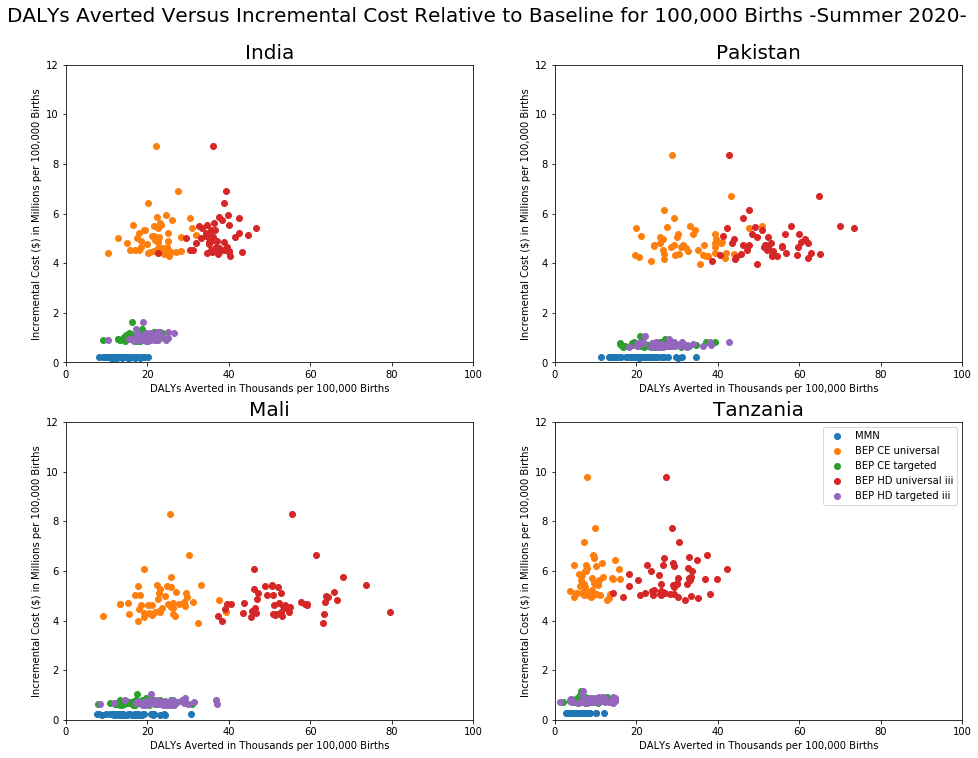

In [21]:
fig, axs = plt.subplots(2,2)

india = master_draws.where(master_draws['location'] == 'India').dropna()
pakistan = master_draws.where(master_draws['location'] == 'Pakistan').dropna()
mali = master_draws.where(master_draws['location'] == 'Mali').dropna()
tanzania = master_draws.where(master_draws['location'] == 'Tanzania').dropna()

#------------------------INDIA---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[0,0].scatter(india['dalys_averted_mmn']*(-1)/1_000, india['cost_diff_mmn']/1_000_000)

#bep ce_universal
axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal']/1_000_000)

#bep ce_targeted
axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
#axs[0,0].scatter(india['dalys_averted_bep_hd_universal_i']*(-1)/1_000, india['cost_diff_bep_hd_universal_i']/1_000_000)
#axs[0,0].scatter(india['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, india['cost_diff_bep_hd_universal_ii']/1_000_000)
axs[0,0].scatter(india['dalys_averted_bep_hd_universal_iii']*(-1)/1_000, india['cost_diff_bep_hd_universal_iii']/1_000_000)

#bep hd_targeted
#axs[0,0].scatter(india['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, india['cost_diff_bep_hd_targeted_i']/1_000_000)
#axs[0,0].scatter(india['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, india['cost_diff_bep_hd_targeted_ii']/1_000_000)
axs[0,0].scatter(india['dalys_averted_bep_hd_targeted_iii']*(-1)/1_000, india['cost_diff_bep_hd_targeted_iii']/1_000_000)

#cost bounds for BEP
# axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[0,0].set_title('India',fontsize=20)
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,12)

#------------------------PAKISTAN---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[0,1].scatter(pakistan['dalys_averted_mmn']*(-1)/1_000, pakistan['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal_i']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_i']/1_000_000)
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_ii']/1_000_000)
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal_iii']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_iii']/1_000_000)

#bep hd_targeted
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_i']/1_000_000)
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_ii']/1_000_000)
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted_iii']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_iii']/1_000_000)

#BEP cost bounds
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[0,1].set_title('Pakistan',fontsize=20)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(0,12)


#------------------------MALI---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[1,0].scatter(mali['dalys_averted_mmn']*(-1)/1_000, mali['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
#axs[1,0].scatter(mali['dalys_averted_bep_hd_universal_i']*(-1)/1_000, mali['cost_diff_bep_hd_universal_i']/1_000_000)
#axs[1,0].scatter(mali['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, mali['cost_diff_bep_hd_universal_ii']/1_000_000)
axs[1,0].scatter(mali['dalys_averted_bep_hd_universal_iii']*(-1)/1_000, mali['cost_diff_bep_hd_universal_iii']/1_000_000)

#bep hd_targeted
#axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_i']/1_000_000)
#axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_ii']/1_000_000)
axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted_iii']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_iii']/1_000_000)

#BEP COST BOUNDS
# axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_universal']*(-1)/1_000, mali['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_universal']*(-1)/1_000, mali['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[1,0].set_title('Mali',fontsize=20)
axs[1,0].set_xlim(0,100)
axs[1,0].set_ylim(0,12)


#------------------------TANZANIA---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[1,1].scatter(tanzania['dalys_averted_mmn']*(-1)/1_000, tanzania['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal_i']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_i']/1_000_000)
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_ii']/1_000_000)
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal_iii']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_iii']/1_000_000)

#bep hd_targeted
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_i']/1_000_000)
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_ii']/1_000_000)
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted_iii']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_iii']/1_000_000)

#BEP COST BOUNDS

#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[1,1].set_title('Tanzania',fontsize=20)
axs[1,1].set_xlim(0,100)
axs[1,1].set_ylim(0,12)


for ax in axs.flat:
    ax.set(xlabel='DALYs Averted in Thousands per 100,000 Births', 
           ylabel='Incremental Cost ($) in Millions per 100,000 Births')
    #ax.label_outer()

plt.legend(['MMN','BEP CE universal','BEP CE targeted', 'BEP HD universal iii','BEP HD targeted iii'], prop={'size': 10})
plt.suptitle('DALYs Averted Versus Incremental Cost Relative to Baseline for 100,000 Births -Summer 2020-',x=1.1,y=2.6,fontsize=20)
plt.subplots_adjust(right=2.2, top=2.4)




# comparing bep hd scenarios i, ii, ii



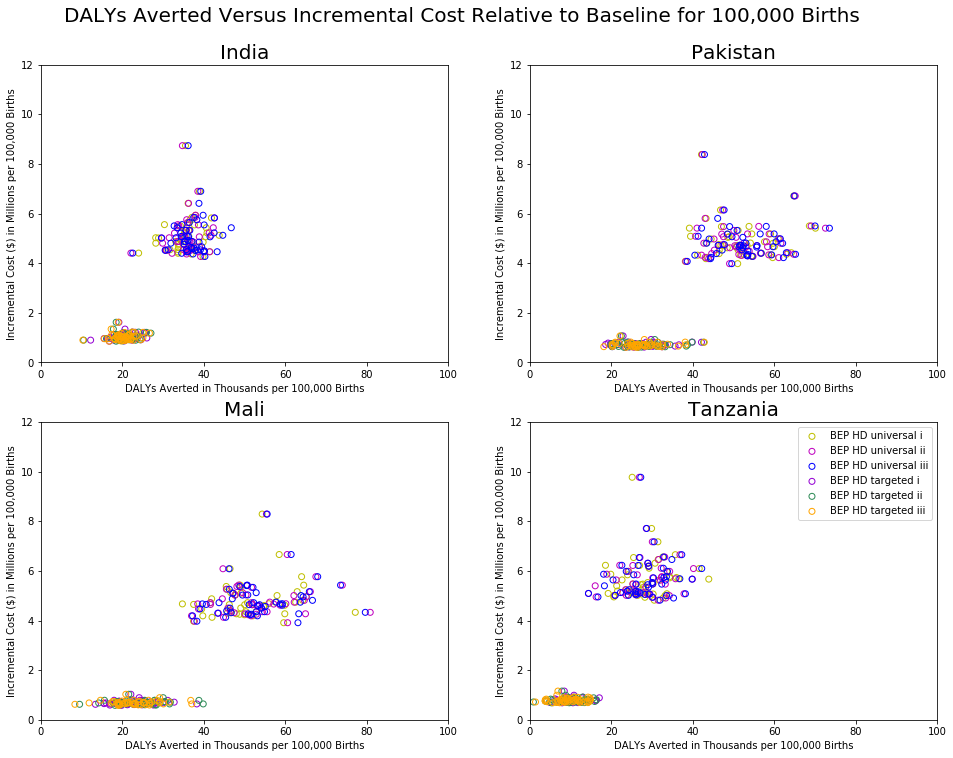

In [22]:
########################################################## HD SCENARIOS ONLY ########################################################################################


fig, axs = plt.subplots(2,2)

india = master_draws.where(master_draws['location'] == 'India').dropna()
pakistan = master_draws.where(master_draws['location'] == 'Pakistan').dropna()
mali = master_draws.where(master_draws['location'] == 'Mali').dropna()
tanzania = master_draws.where(master_draws['location'] == 'Tanzania').dropna()

#------------------------INDIA---------------------------------------------------------------------------------------------------------------------------------------#

#bep hd_universal
axs[0,0].scatter(india['dalys_averted_bep_hd_universal_i']*(-1)/1_000, india['cost_diff_bep_hd_universal_i']/1_000_000, marker='o', facecolors='none', edgecolors='y')
axs[0,0].scatter(india['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, india['cost_diff_bep_hd_universal_ii']/1_000_000, marker='o', facecolors='none', edgecolors='m')
axs[0,0].scatter(india['dalys_averted_bep_hd_universal_iii']*(-1)/1_000, india['cost_diff_bep_hd_universal_iii']/1_000_000, marker='o', facecolors='none', edgecolors='b')

#bep hd_targeted
axs[0,0].scatter(india['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, india['cost_diff_bep_hd_targeted_i']/1_000_000, marker='o', facecolors='none', edgecolors='darkviolet')
axs[0,0].scatter(india['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, india['cost_diff_bep_hd_targeted_ii']/1_000_000, marker='o', facecolors='none', edgecolors='seagreen')
axs[0,0].scatter(india['dalys_averted_bep_hd_targeted_iii']*(-1)/1_000, india['cost_diff_bep_hd_targeted_iii']/1_000_000, marker='o', facecolors='none', edgecolors='orange')

axs[0,0].set_title('India',fontsize=20)
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,12)

#------------------------PAKISTAN---------------------------------------------------------------------------------------------------------------------------------------#

#bep hd_universal               
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal_i']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_i']/1_000_000, marker='o', facecolors='none', edgecolors='y')
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_ii']/1_000_000, marker='o', facecolors='none', edgecolors='m')
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal_iii']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_iii']/1_000_000, marker='o', facecolors='none', edgecolors='b')

#bep hd_targeted
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_i']/1_000_000, marker='o', facecolors='none', edgecolors='darkviolet')
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_ii']/1_000_000, marker='o', facecolors='none', edgecolors='seagreen')
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted_iii']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_iii']/1_000_000, marker='o', facecolors='none', edgecolors='orange')

axs[0,1].set_title('Pakistan',fontsize=20)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(0,12)


#------------------------MALI---------------------------------------------------------------------------------------------------------------------------------------#

#bep hd_universal
axs[1,0].scatter(mali['dalys_averted_bep_hd_universal_i']*(-1)/1_000, mali['cost_diff_bep_hd_universal_i']/1_000_000, marker='o', facecolors='none', edgecolors='y')
axs[1,0].scatter(mali['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, mali['cost_diff_bep_hd_universal_ii']/1_000_000, marker='o', facecolors='none', edgecolors='m')
axs[1,0].scatter(mali['dalys_averted_bep_hd_universal_iii']*(-1)/1_000, mali['cost_diff_bep_hd_universal_iii']/1_000_000, marker='o', facecolors='none', edgecolors='b')

#bep hd_targeted
axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_i']/1_000_000, marker='o', facecolors='none', edgecolors='darkviolet')
axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_ii']/1_000_000, marker='o', facecolors='none', edgecolors='seagreen')
axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted_iii']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_iii']/1_000_000, marker='o', facecolors='none', edgecolors='orange')

axs[1,0].set_title('Mali',fontsize=20)
axs[1,0].set_xlim(0,100)
axs[1,0].set_ylim(0,12)


#------------------------TANZANIA---------------------------------------------------------------------------------------------------------------------------------------#

#bep hd_universal
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal_i']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_i']/1_000_000, marker='o', facecolors='none', edgecolors='y')
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_ii']/1_000_000, marker='o', facecolors='none', edgecolors='m')
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal_iii']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_iii']/1_000_000, marker='o', facecolors='none', edgecolors='b')

#bep hd_targeted
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_i']/1_000_000, marker='o', facecolors='none', edgecolors='darkviolet')
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_ii']/1_000_000, marker='o', facecolors='none', edgecolors='seagreen')
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted_iii']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_iii']/1_000_000, marker='o', facecolors='none', edgecolors='orange')


axs[1,1].set_title('Tanzania',fontsize=20)
axs[1,1].set_xlim(0,100)
axs[1,1].set_ylim(0,12)


for ax in axs.flat:
    ax.set(xlabel='DALYs Averted in Thousands per 100,000 Births', 
           ylabel='Incremental Cost ($) in Millions per 100,000 Births')
    #ax.label_outer()

plt.legend(['BEP HD universal i', 'BEP HD universal ii', 'BEP HD universal iii', 'BEP HD targeted i', 'BEP HD targeted ii', 'BEP HD targeted iii'], prop={'size': 10})
plt.suptitle('DALYs Averted Versus Incremental Cost Relative to Baseline for 100,000 Births',x=1.1,y=2.6,fontsize=20)
plt.subplots_adjust(right=2.2, top=2.4)


# --------------------------------------
# COST DIFFERENCE ONLY
# --------------------------------------

In [23]:
india = master_draws.where(master_draws['location'] == 'India').dropna()
india.head()

,input_draw,dalys_baseline,person_time,total_population_baseline,bep_population_baseline,ifa_population_baseline,mmn_population_baseline,untreated_population_baseline,location_baseline,cost,...,icer_bep_hd_targeted_high_iii,icer_bep_ce_universal_rel_to_mmn,icer_bep_ce_targeted_rel_to_mmn,icer_bep_hd_universal_rel_to_mmn_i,icer_bep_hd_universal_rel_to_mmn_ii,icer_bep_hd_universal_rel_to_mmn_iii,icer_bep_hd_targeted_rel_to_mmn_i,icer_bep_hd_targeted_rel_to_mmn_ii,icer_bep_hd_targeted_rel_to_mmn_iii,location
0,3.0,315693.578494,193471.006160,100000.0,0.0,35192.0,0.0,64808.0,India,94666.48,...,-52.416192,-633.280946,-250.885591,-217.904430,-205.031537,-203.371954,-132.386092,-89.369031,-116.607646,India
1,21.0,305401.406728,193746.198494,100000.0,0.0,39783.0,0.0,60217.0,India,107016.27,...,-45.015440,-1137.880214,-653.910774,-275.000568,-272.274035,-258.314767,-202.399292,-201.083917,-145.368750,India
2,29.0,338268.119252,193115.381246,100000.0,0.0,36533.0,0.0,63467.0,India,98273.77,...,-47.750648,-435.111926,-152.150654,-217.002786,-216.917824,-202.709514,-112.367646,-92.420068,-110.166758,India
3,55.0,317967.574723,193472.695414,100000.0,0.0,32773.0,0.0,67227.0,India,88159.37,...,-49.470458,-737.606691,-244.355915,-223.973675,-220.330234,-221.910698,-125.785087,-105.807314,-112.263679,India
4,78.0,303782.472381,193772.731006,100000.0,0.0,32504.0,0.0,67496.0,India,87435.76,...,-47.020018,-657.442415,-239.256299,-289.742204,-303.196027,-266.891358,-176.719585,-206.636689,-187.000596,India


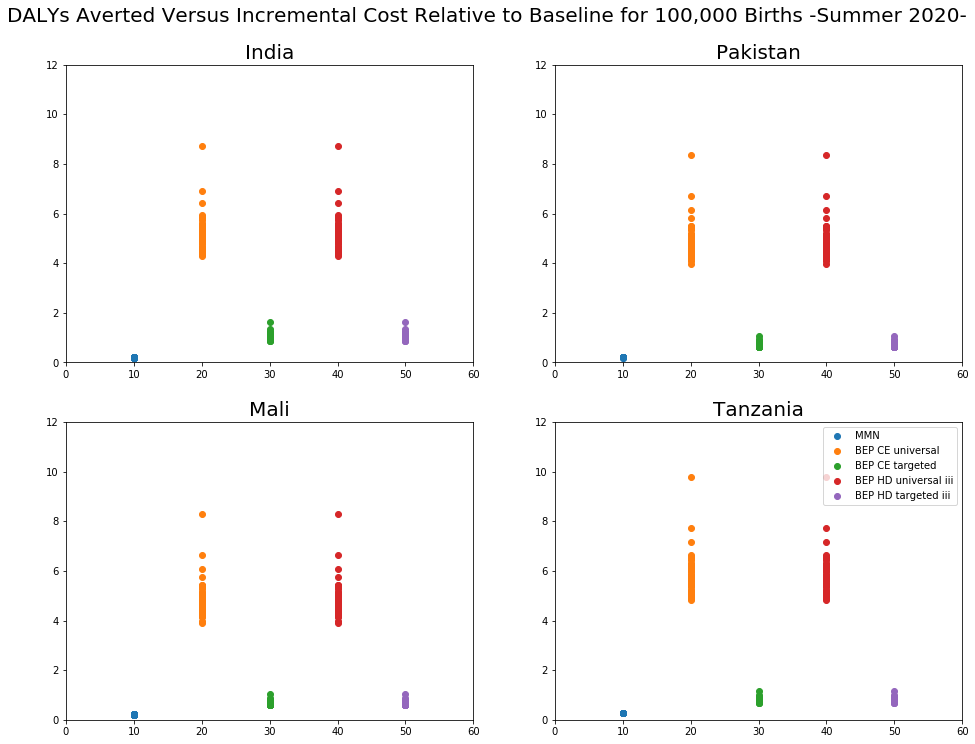

In [24]:
fig, axs = plt.subplots(2,2)

india = master_draws.where(master_draws['location'] == 'India').dropna()
india['10'] = 10
india['20'] = 20
india['30'] = 30
india['40'] = 40
india['50'] = 50

pakistan = master_draws.where(master_draws['location'] == 'Pakistan').dropna()
pakistan['10'] = 10
pakistan['20'] = 20
pakistan['30'] = 30
pakistan['40'] = 40
pakistan['50'] = 50

mali = master_draws.where(master_draws['location'] == 'Mali').dropna()
mali['10'] = 10
mali['20'] = 20
mali['30'] = 30
mali['40'] = 40
mali['50'] = 50

tanzania = master_draws.where(master_draws['location'] == 'Tanzania').dropna()
tanzania['10'] = 10
tanzania['20'] = 20
tanzania['30'] = 30
tanzania['40'] = 40
tanzania['50'] = 50

#------------------------INDIA---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[0,0].scatter(india['10'], india['cost_diff_mmn']/1_000_000)

#bep ce_universal
axs[0,0].scatter(india['20'], india['cost_diff_bep_ce_universal']/1_000_000)

#bep ce_targeted
axs[0,0].scatter(india['30'], india['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
#axs[0,0].scatter(india['dalys_averted_bep_hd_universal_i']*(-1)/1_000, india['cost_diff_bep_hd_universal_i']/1_000_000)
#axs[0,0].scatter(india['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, india['cost_diff_bep_hd_universal_ii']/1_000_000)
axs[0,0].scatter(india['40'], india['cost_diff_bep_hd_universal_iii']/1_000_000)

#bep hd_targeted
#axs[0,0].scatter(india['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, india['cost_diff_bep_hd_targeted_i']/1_000_000)
#axs[0,0].scatter(india['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, india['cost_diff_bep_hd_targeted_ii']/1_000_000)
axs[0,0].scatter(india['50'], india['cost_diff_bep_hd_targeted_iii']/1_000_000)

#cost bounds for BEP
# axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[0,0].set_title('India',fontsize=20)
axs[0,0].set_xlim(0,60)
axs[0,0].set_ylim(0,12)

#------------------------PAKISTAN---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[0,1].scatter(pakistan['10'], pakistan['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[0,1].scatter(pakistan['20'], pakistan['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[0,1].scatter(pakistan['30'], pakistan['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal_i']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_i']/1_000_000)
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_ii']/1_000_000)
axs[0,1].scatter(pakistan['40'], pakistan['cost_diff_bep_hd_universal_iii']/1_000_000)

#bep hd_targeted
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_i']/1_000_000)
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_ii']/1_000_000)
axs[0,1].scatter(pakistan['50'], pakistan['cost_diff_bep_hd_targeted_iii']/1_000_000)

#BEP cost bounds
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[0,1].set_title('Pakistan',fontsize=20)
axs[0,1].set_xlim(0,60)
axs[0,1].set_ylim(0,12)


#------------------------MALI---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[1,0].scatter(mali['10'], mali['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[1,0].scatter(mali['20'], mali['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[1,0].scatter(mali['30'], mali['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
#axs[1,0].scatter(mali['dalys_averted_bep_hd_universal_i']*(-1)/1_000, mali['cost_diff_bep_hd_universal_i']/1_000_000)
#axs[1,0].scatter(mali['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, mali['cost_diff_bep_hd_universal_ii']/1_000_000)
axs[1,0].scatter(mali['40'], mali['cost_diff_bep_hd_universal_iii']/1_000_000)

#bep hd_targeted
#axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_i']/1_000_000)
#axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_ii']/1_000_000)
axs[1,0].scatter(mali['50'], mali['cost_diff_bep_hd_targeted_iii']/1_000_000)

#BEP COST BOUNDS
# axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_universal']*(-1)/1_000, mali['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_universal']*(-1)/1_000, mali['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[1,0].set_title('Mali',fontsize=20)
axs[1,0].set_xlim(0,60)
axs[1,0].set_ylim(0,12)


#------------------------TANZANIA---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[1,1].scatter(tanzania['10'], tanzania['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[1,1].scatter(tanzania['20'], tanzania['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[1,1].scatter(tanzania['30'], tanzania['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal_i']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_i']/1_000_000)
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_ii']/1_000_000)
axs[1,1].scatter(tanzania['40'], tanzania['cost_diff_bep_hd_universal_iii']/1_000_000)

#bep hd_targeted
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_i']/1_000_000)
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_ii']/1_000_000)
axs[1,1].scatter(tanzania['50'], tanzania['cost_diff_bep_hd_targeted_iii']/1_000_000)

#BEP COST BOUNDS

#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[1,1].set_title('Tanzania',fontsize=20)
axs[1,1].set_xlim(0,60)
axs[1,1].set_ylim(0,12)

plt.legend(['MMN','BEP CE universal','BEP CE targeted', 'BEP HD universal iii','BEP HD targeted iii'], prop={'size': 10}, loc=1)
plt.suptitle('DALYs Averted Versus Incremental Cost Relative to Baseline for 100,000 Births -Summer 2020-',x=1.1,y=2.6,fontsize=20)
plt.subplots_adjust(right=2.2, top=2.4)


# ==================

# DALYs BAR PLOTS

# ==================




# ALL SCENARIOs

color coding and scenario order (https://matplotlib.org/3.1.0/gallery/color/named_colors.html): 

- 1) baseline = grey
- 2) mmn = blue

- 3) BEP_ce_universal = mediumvioletred
- 4) BEP_hd_universal_i = orange
- 5) BEP_hd_universal_ii = darkorange
- 6) BEP_hd_universal_iii = tab:pink


- 7) BEP_ce_targeted = olivedrab
- 8) BEP_hd_targeted_i = cornflowerblue
- 9) BEP_hd_targeted_ii = royalblue
- 10) BEP_hd_targeted_iii = mediumseagreen

[0    317.882259
0    449.338646
0    723.069813
0    407.161003
Name: mean, dtype: float64, 78    304.071656
78    428.372275
78    707.309302
78    401.137124
Name: mean, dtype: float64, 85    295.729370
85    416.754678
85    699.570607
85    397.948156
Name: mean, dtype: float64, 37    281.003824
37    396.567104
37    669.773725
37    378.597996
Name: mean, dtype: float64, 67    300.574460
67    424.661391
67    705.074710
67    399.786825
Name: mean, dtype: float64, 7    297.621576
7    422.024103
7    699.957242
7    397.869868
Name: mean, dtype: float64]


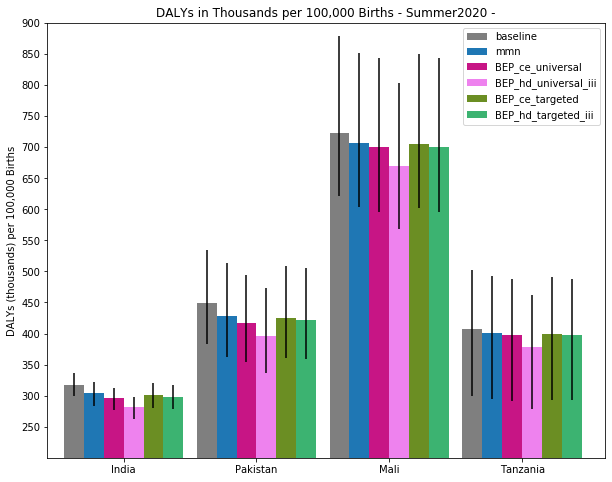

In [25]:
#DALYS all scenarios

data = master_avg #.where(master_avg['malnourishment_category'] == 'all').dropna()

# bar width
barWidth = 0.15
w = 0.15

# bar heights

#baseline 1
baseline = master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna() / 1_000
baseline_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_baseline').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna())/ 1_000
baseline_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_baseline').dropna())/ 1_000

#mmn 2
mmn = master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna()/ 1_000
mmn_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_mmn').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna())/ 1_000
mmn_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_mmn').dropna())/ 1_000


#bep_ce_universal 3
bep_ce_universal = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_universal').dropna() /1_000
bep_ce_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_ce_universal').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_universal').dropna())/ 1_000
bep_ce_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_universal').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_ce_universal').dropna())/1_000

#bep_hd_universal 4
bep_hd_universal = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal_iii').dropna() /1_000
bep_hd_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_hd_universal_iii').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal_iii').dropna())/ 1_000
bep_hd_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal_iii').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_hd_universal_iii').dropna())/1_000

#bep_ce_targeted 5
bep_ce_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_targeted').dropna()/1_000
bep_ce_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_ce_targeted').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_targeted').dropna())/1_000
bep_ce_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_targeted').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_ce_targeted').dropna())/1_000

#bep_hd_targeted 6
bep_hd_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted_iii').dropna()/1_000
bep_hd_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_hd_targeted_iii').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted_iii').dropna())/1_000
bep_hd_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted_iii').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_hd_targeted_iii').dropna())/1_000



# x-values bar positions
# baseline_x         = [6*element + w*1 for element in range (4)] 
# mmn_x              = [6*element + w*2 for element in range (4)]
# bep_ce_universal_x = [6*element + w*3 for element in range (4)] 
# bep_ce_targeted_x  = [6*element + w*4 for element in range (4)]
# bep_hd_universal_x = [6*element + w*5 for element in range (4)]
# bep_hd_targeted_x  = [6*element + w*6 for element in range (4)]

baseline_x = np.arange(len(baseline)) 
mmn_x = [x + barWidth for x in baseline_x]
bep_ce_universal_x = [x + barWidth for x in mmn_x]
bep_hd_universal_x = [x + barWidth for x in bep_ce_universal_x]
bep_ce_targeted_x = [x + barWidth for x in bep_hd_universal_x]
bep_hd_targeted_x = [x + barWidth for x in bep_ce_targeted_x]

# plot
plt.figure(figsize=(10,8))

#---- note: yerrs should be lower, upper

# baseline
plt.bar(baseline_x, baseline, yerr=[baseline_lower, baseline_upper], width=barWidth, color='tab:grey', label='baseline')

#mmn
plt.bar(mmn_x, mmn, yerr=[mmn_lower, mmn_upper], width=barWidth, color='tab:blue',label='mmn')

#unicersal ce and hd
plt.bar(bep_ce_universal_x, bep_ce_universal, yerr=[bep_ce_universal_lower, bep_ce_universal_upper], width=barWidth, color='mediumvioletred', label='BEP_ce_universal')
plt.bar(bep_hd_universal_x, bep_hd_universal, yerr=[bep_hd_universal_lower, bep_hd_universal_upper], width=barWidth, color='violet', label='BEP_hd_universal_iii')

#targeted ce and hd
plt.bar(bep_ce_targeted_x, bep_ce_targeted, yerr=[bep_ce_targeted_lower, bep_ce_targeted_upper], width=barWidth, color='olivedrab', label='BEP_ce_targeted')
plt.bar(bep_hd_targeted_x, bep_hd_targeted, yerr=[bep_hd_targeted_lower, bep_hd_targeted_upper], width=barWidth, color='mediumseagreen', label='BEP_hd_targeted_iii')

plt.xticks([r + 2.5*barWidth for r in range(len(baseline))], master_avg['location'].where(master_avg['index'] == 'dalys_baseline').dropna())

plt.axis([-0.2 , 4 , 200, 900])
plt.yticks([250,300,350,400,450,500,550,600,650,700,750,800,850,900])
plt.ylabel('DALYs (thousands) per 100,000 Births')
plt.title('DALYs in Thousands per 100,000 Births - Summer2020 -')

y = [baseline, mmn, bep_ce_universal, bep_hd_universal, bep_ce_targeted, bep_hd_targeted]
print(y)

plt.legend()
#plt.savefig('fig_DALYS')


# scenarios baseline, mmn, bep_hd_universal_iii, bep_hd_targeted_iii




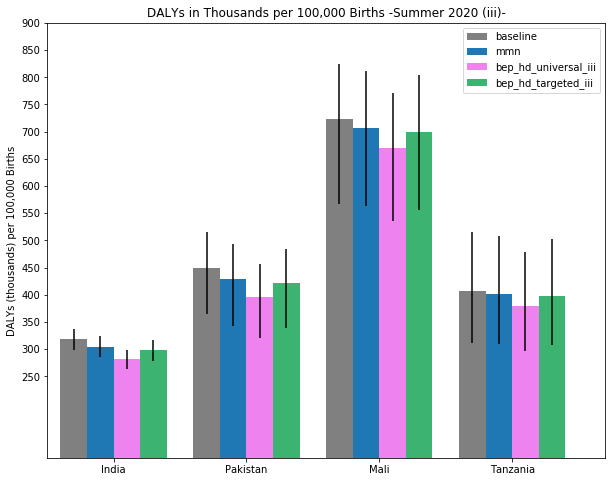

In [26]:
#baseline, mmn, bep_hd_universal_iii, bep_hd_targeted_iii

data = master_avg#.where(master_avg['malnourishment_category'] == 'all').dropna()

# bar width
barWidth = 0.2

# bar heights
baseline = master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna() / 1_000
baseline_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_baseline').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna())/ 1_000
baseline_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_baseline').dropna())/ 1_000

mmn = master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna()/ 1_000
mmn_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_mmn').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna())/ 1_000
mmn_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_mmn').dropna())/ 1_000

bep = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal_iii').dropna() /1_000
bep_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_hd_universal_iii').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal_iii').dropna())/ 1_000
bep_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal_iii').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_hd_universal_iii').dropna())/1_000

bep_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted_iii').dropna()/1_000
bep_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_hd_targeted_iii').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted_iii').dropna())/1_000
bep_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted_iii').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_hd_targeted_iii').dropna())/1_000

# bar positions
baseline_x = np.arange(len(baseline)) 
mmn_x = [x + barWidth for x in baseline_x]
bep_x = [x + barWidth for x in mmn_x]
bep_targeted_x = [x + barWidth for x in bep_x]

# plot
plt.figure(figsize=(10,8))
plt.bar(baseline_x, baseline, yerr=[baseline_upper, baseline_lower], width=barWidth, color='grey', label='baseline')
plt.bar(mmn_x, mmn, yerr=[mmn_upper, mmn_lower], width=barWidth, color='tab:blue', label='mmn')
plt.bar(bep_x, bep, yerr=[bep_upper, bep_lower], width=barWidth, color='violet', label='bep_hd_universal_iii')
plt.bar(bep_targeted_x, bep_targeted, yerr=[bep_targeted_upper, bep_targeted_lower], width=barWidth, color ='mediumseagreen',label='bep_hd_targeted_iii')

#
plt.xticks([r + 1.5*barWidth for r in range(len(baseline))], master_avg['location'].where(master_avg['index'] == 'dalys_baseline').dropna())
plt.axis([-0.2 , 4 , 100, 900])
plt.yticks([250,300,350,400,450,500,550,600,650,700,750,800,850,900])
plt.ylabel('DALYs (thousands) per 100,000 Births')
plt.title('DALYs in Thousands per 100,000 Births -Summer 2020 (iii)-')
plt.legend(loc=1)
plt.savefig('fig_DALYS')

# -------------------------
# DALYs averted 
# -------------------------

[0    317.882259
0    449.338646
0    723.069813
0    407.161003
Name: mean, dtype: float64, 95    13.810603
95    20.966371
95    15.760512
95     6.023879
Name: mean, dtype: float64, 97    22.152889
97    32.583967
97    23.499207
97     9.212847
Name: mean, dtype: float64, 116    36.878436
116    52.771542
116    53.296088
116    28.563008
Name: mean, dtype: float64, 102    17.307800
102    24.677254
102    17.995103
102     7.374178
Name: mean, dtype: float64, 129    20.260683
129    27.314543
129    23.112571
129     9.291135
Name: mean, dtype: float64]


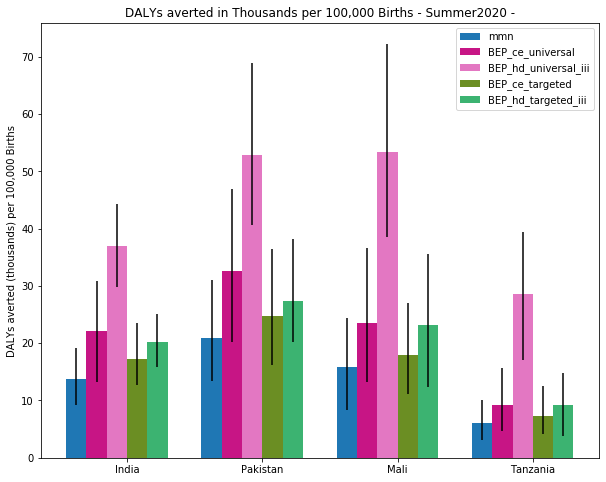

In [27]:
#DALYS AVERTED all scenarios

data = master_avg #.where(master_avg['malnourishment_category'] == 'all').dropna()

# bar width
barWidth = 0.15
w = 0.15

# bar heights

#mmn 1
mmn = master_avg['mean'].where(master_avg['index'] == 'dalys_averted_mmn').dropna()*(-1)/ 1_000
mmn_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_averted_mmn').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_averted_mmn').dropna())*(-1)/ 1_000
mmn_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_averted_mmn').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_averted_mmn').dropna())*(-1)/ 1_000


#bep_ce_universal 3
bep_ce_universal = master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_universal').dropna() *(-1)/1_000
bep_ce_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_averted_bep_ce_universal').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_universal').dropna())*(-1)/ 1_000
bep_ce_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_universal').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_averted_bep_ce_universal').dropna())*(-1)/1_000

#bep_hd_universal 4
bep_hd_universal = master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_universal_iii').dropna() *(-1)/1_000
bep_hd_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_averted_bep_hd_universal_iii').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_universal_iii').dropna())*(-1)/ 1_000
bep_hd_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_universal_iii').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_averted_bep_hd_universal_iii').dropna())*(-1)/1_000

#bep_ce_targeted 5
bep_ce_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_targeted').dropna()*(-1)/1_000
bep_ce_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_averted_bep_ce_targeted').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_targeted').dropna())*(-1)/1_000
bep_ce_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_targeted').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_averted_bep_ce_targeted').dropna())*(-1)/1_000

#bep_hd_targeted 6
bep_hd_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_targeted_iii').dropna()*(-1)/1_000
bep_hd_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_averted_bep_hd_targeted_iii').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_targeted_iii').dropna())*(-1)/1_000
bep_hd_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_targeted_iii').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_averted_bep_hd_targeted_iii').dropna())*(-1)/1_000


# x-values bar positions
# baseline_x         = [6*element + w*1 for element in range (4)] 
# mmn_x              = [6*element + w*2 for element in range (4)]
# bep_ce_universal_x = [6*element + w*3 for element in range (4)] 
# bep_ce_targeted_x  = [6*element + w*4 for element in range (4)]
# bep_hd_universal_x = [6*element + w*5 for element in range (4)]
# bep_hd_targeted_x  = [6*element + w*6 for element in range (4)]

mmn_x = np.arange(len(mmn)) 
bep_ce_universal_x = [x + barWidth for x in mmn_x]
bep_hd_universal_x = [x + barWidth for x in bep_ce_universal_x]
bep_ce_targeted_x  = [x + barWidth for x in bep_hd_universal_x]
bep_hd_targeted_x  = [x + barWidth for x in bep_ce_targeted_x]

# plot
plt.figure(figsize=(10,8))

#---- note: yerrs should be lower, upper

#mmn
plt.bar(mmn_x, mmn, yerr=[mmn_lower, mmn_upper], width=barWidth, color='tab:blue',label='mmn')

#unicersal ce and hd
plt.bar(bep_ce_universal_x, bep_ce_universal, yerr=[bep_ce_universal_lower, bep_ce_universal_upper], width=barWidth, color='mediumvioletred', label='BEP_ce_universal')
plt.bar(bep_hd_universal_x, bep_hd_universal, yerr=[bep_hd_universal_lower, bep_hd_universal_upper], width=barWidth, color='tab:pink', label='BEP_hd_universal_iii')

#targeted ce and hd
plt.bar(bep_ce_targeted_x, bep_ce_targeted, yerr=[bep_ce_targeted_lower, bep_ce_targeted_upper], width=barWidth, color='olivedrab', label='BEP_ce_targeted')
plt.bar(bep_hd_targeted_x, bep_hd_targeted, yerr=[bep_hd_targeted_lower, bep_hd_targeted_upper], width=barWidth, color='mediumseagreen', label='BEP_hd_targeted_iii')

plt.xticks([r + 2.5*barWidth for r in range(len(baseline))], master_avg['location'].where(master_avg['index'] == 'dalys_baseline').dropna())

#plt.axis([-0.2 , 4 , 200, 900])
#plt.yticks([250,300,350,400,450,500,550,600,650,700,750,800,850,900])
plt.ylabel('DALYs averted (thousands) per 100,000 Births')
plt.title('DALYs averted in Thousands per 100,000 Births - Summer2020 -')

y = [baseline, mmn, bep_ce_universal, bep_hd_universal, bep_ce_targeted, bep_hd_targeted]
print(y)

plt.legend()
#plt.savefig('fig_DALYS')

In [28]:
print(mmn)

95    13.810603
95    20.966371
95    15.760512
95     6.023879
Name: mean, dtype: float64


# ==================================================================================================================

# ICER BAR PLOTS

# ==================================================================================================================

# scenarios: mmn, bep_ce_universal, bep_universal_hd_iii, bep_ce_targeted, bep_targeted_hd_iii

[149    15.242152
149    10.831058
149    14.802299
149    49.926293
Name: mean, dtype: float64, 150    239.017731
150    157.503239
150    219.719296
150    685.093423
Name: mean, dtype: float64, 162    139.413976
162     94.506665
162     92.774051
162    208.670806
Name: mean, dtype: float64, 153     60.948540
153     30.294055
153     41.082113
153    120.186267
Name: mean, dtype: float64, 171     51.742788
171     27.094365
171     31.911024
171    104.601691
Name: mean, dtype: float64]
[149    -4.787588
149    -4.273493
149    -6.227163
149   -24.083381
dtype: float64, array([ -77.35240399,  -55.21529544,  -97.58970042, -314.11627533]), array([-32.13421948, -26.1120257 , -29.51332227, -68.74821583]), array([-15.33599471,  -9.9210654 , -16.80854133, -54.78687674]), array([-12.32949984,  -8.44432472, -10.63087357, -53.60821375])]
[149    -6.951002
149    -5.296204
149   -10.912028
149   -39.459211
dtype: float64, array([-156.19291159, -106.01314027, -130.35792869, -609.7034361 ]), 

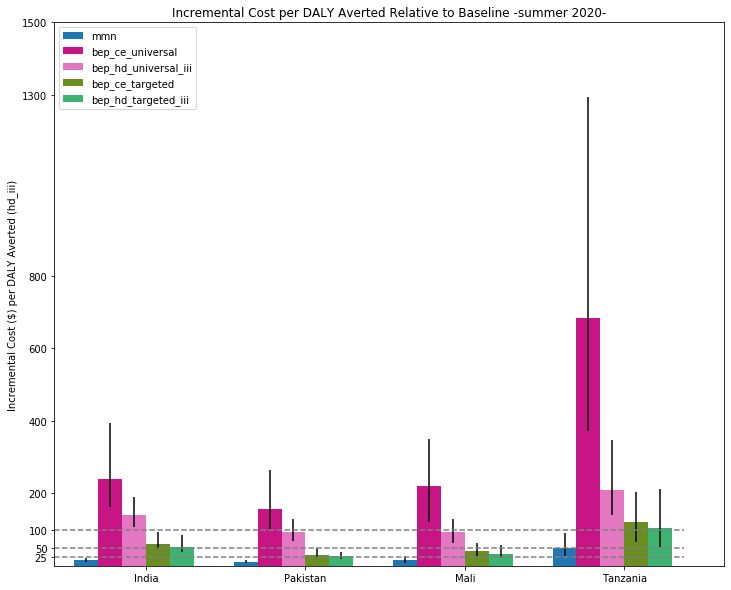

In [34]:
#LINEAR

data = master_avg #.where(master_avg['malnourishment_category'] == 'all').dropna()*(-1)

# bar width
barWidth = 0.15

# bar heights (y-axis) 
mmn = master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
mmn_upper =  master_avg['max'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1) - master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
mmn_lower =  master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1) - master_avg['min'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)

bep_ce_universal = master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna()*(-1)
bep_ce_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1))
bep_ce_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1))

bep_hd_universal_iii = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna()*(-1)
bep_hd_universal_iii_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1))
bep_hd_universal_iii_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1))

bep_ce_targeted = master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna()*(-1)
bep_ce_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1))
bep_ce_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1))

bep_hd_targeted_iii = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna()*(-1)
bep_hd_targeted_iii_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1))
bep_hd_targeted_iii_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1))


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# bar positions (for x-axis)
mmn_x = np.arange(len(mmn)) 
bep_ce_universal_x = [x + barWidth for x in mmn_x]
bep_hd_universal_iii_x = [x + barWidth for x in bep_ce_universal_x]
bep_ce_targeted_x = [x + barWidth for x in bep_hd_universal_iii_x ]
bep_hd_targeted_iii_x = [x + barWidth for x in bep_ce_targeted_x]

# plot

plt.figure(figsize=(12,10))
plt.bar(mmn_x, mmn, yerr=[mmn_lower, mmn_upper], width=barWidth, label = 'mmn')
plt.bar(bep_ce_universal_x, bep_ce_universal, yerr=[bep_ce_universal_lower, bep_ce_universal_upper], width=barWidth, label = 'bep_ce_universal', color = 'mediumvioletred')
plt.bar(bep_hd_universal_iii_x, bep_hd_universal_iii, yerr=[bep_hd_universal_iii_lower, bep_hd_universal_iii_upper], width=barWidth, label = 'bep_hd_universal_iii', color = 'tab:pink')
plt.bar(bep_ce_targeted_x, bep_ce_targeted, yerr=[bep_ce_targeted_lower, bep_ce_targeted_upper], width=barWidth, label = 'bep_ce_targeted', color = 'olivedrab')
plt.bar(bep_hd_targeted_iii_x, bep_hd_targeted_iii, yerr=[bep_hd_targeted_iii_lower, bep_hd_targeted_iii_upper], width=barWidth, label = 'bep_hd_targeted_iii', color = 'mediumseagreen')

plt.legend(loc='upper left')

threshold = 100
threshold2 = 50
threshold3 = 25
plt.plot([-0.25,len(mmn)-.25], [threshold, threshold],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold3, threshold3],'k--', c='gray')

#
plt.axis([-0.2 , 4 , 0, 1500])
plt.yticks([25,50,100,200,400,600,800,1300, 1500])
#plt.yscale('log') 
plt.xticks([r + 2.5*barWidth for r in range(len(mmn))], master_avg['location'].where(master_avg['index'] == 'icer_mmn').dropna())
plt.ylabel('Incremental Cost ($) per DALY Averted (hd_iii)')
plt.title('Incremental Cost per DALY Averted Relative to Baseline -summer 2020-')
#plt.savefig('fig_ICERS_baseline')

y = [mmn, bep_ce_universal, bep_hd_universal_iii, bep_ce_targeted, bep_hd_targeted_iii]
y_lower = [mmn_lower, bep_ce_universal_lower, bep_hd_universal_iii_lower, bep_ce_targeted_lower, bep_hd_targeted_iii_lower]
y_upper = [mmn_upper, bep_ce_universal_upper, bep_hd_universal_iii_upper, bep_ce_targeted_upper, bep_hd_targeted_iii_upper]

print(y)
print(y_upper)
print(y_lower)

In [30]:
mmn = master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
np.log(mmn)

149    2.724065
149    2.382418
149    2.694783
149    3.910548
Name: mean, dtype: float64

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


[149    15.242152
149    10.831058
149    14.802299
149    49.926293
Name: mean, dtype: float64, 150    239.017731
150    157.503239
150    219.719296
150    685.093423
Name: mean, dtype: float64, 162    139.413976
162     94.506665
162     92.774051
162    208.670806
Name: mean, dtype: float64, 153     60.948540
153     30.294055
153     41.082113
153    120.186267
Name: mean, dtype: float64, 171     51.742788
171     27.094365
171     31.911024
171    104.601691
Name: mean, dtype: float64]


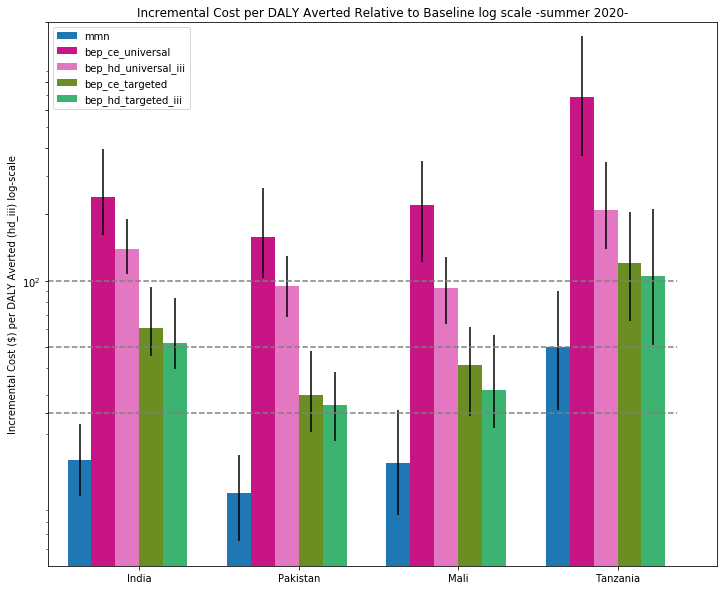

In [35]:
#LOG SCALE

data = master_avg #.where(master_avg['malnourishment_category'] == 'all').dropna()*(-1)

# bar width
barWidth = 0.15

# bar heights (y-axis) LOG
mmn = master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
mmn_upper =  master_avg['max'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1) - master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
mmn_lower =  master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1) - master_avg['min'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)

#mmn = np.log(mmn)
# mmn_upper = np.log(mmn_upper)
# mmn_lower = np.log(mmn_lower)

bep_ce_universal = master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna()*(-1)
bep_ce_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1))
bep_ce_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1))

#bep_ce_universal = np.log(bep_ce_universal)
#bep_ce_universal_upper = np.log(bep_ce_universal_upper) 
#bep_ce_universal_lower = np.log(bep_ce_universal_lower)

bep_hd_universal_iii = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna()*(-1)
bep_hd_universal_iii_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1))
bep_hd_universal_iii_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1))

#bep_hd_universal_iii = np.log(bep_hd_universal_iii)
#bep_hd_universal_iii_upper = np.log(bep_hd_universal_iii_upper)
#bep_hd_universal_iii_lower = np.log(bep_hd_universal_iii_lower)

bep_ce_targeted = master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna()*(-1)
bep_ce_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1))
bep_ce_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1))

#bep_ce_targeted = np.log(bep_ce_targeted)
#bep_ce_targeted_upper = np.log(bep_ce_targeted_upper)
#bep_ce_targeted_lower = np.log(bep_ce_targeted_lower)

bep_hd_targeted_iii = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna()*(-1)
bep_hd_targeted_iii_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1))
bep_hd_targeted_iii_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1))

#bep_hd_targeted = np.log(bep_hd_targeted)
#bep_hd_targeted_upper = np.log(bep_hd_targeted_upper)
#bep_hd_targeted_lower = np.log(bep_hd_targeted_lower)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# bar positions (for x-axis)
mmn_x = np.arange(len(mmn)) 
bep_ce_universal_x = [x + barWidth for x in mmn_x]
bep_hd_universal_iii_x = [x + barWidth for x in bep_ce_universal_x]
bep_ce_targeted_x = [x + barWidth for x in bep_hd_universal_iii_x ]
bep_hd_targeted_iii_x = [x + barWidth for x in bep_ce_targeted_x]

# plot

plt.figure(figsize=(12,10))
plt.bar(mmn_x, mmn, yerr=[mmn_lower, mmn_upper], width=barWidth, label = 'mmn')
plt.bar(bep_ce_universal_x, bep_ce_universal, yerr=[bep_ce_universal_lower, bep_ce_universal_upper], width=barWidth, label = 'bep_ce_universal', color = 'mediumvioletred')
plt.bar(bep_hd_universal_iii_x, bep_hd_universal_iii, yerr=[bep_hd_universal_iii_lower, bep_hd_universal_iii_upper], width=barWidth, label = 'bep_hd_universal_iii', color = 'tab:pink')
plt.bar(bep_ce_targeted_x, bep_ce_targeted, yerr=[bep_ce_targeted_lower, bep_ce_targeted_upper], width=barWidth, label = 'bep_ce_targeted', color = 'olivedrab')
plt.bar(bep_hd_targeted_iii_x, bep_hd_targeted_iii, yerr=[bep_hd_targeted_iii_lower, bep_hd_targeted_iii_upper], width=barWidth, label = 'bep_hd_targeted_iii', color = 'mediumseagreen')

plt.legend(loc='upper left')

threshold = 100
threshold2 = 50
threshold3 = 25
plt.plot([-0.25,len(mmn)-.25], [threshold, threshold],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold3, threshold3],'k--', c='gray')

#
plt.yscale('log')
plt.axis([-0.2 , 4 , 0, 200])
plt.yticks([25,50,100,200,400,600,800,1500])
#plt.yticklabels(['25','50','100','200','400','800',1600])

plt.xticks([r + 2.5*barWidth for r in range(len(mmn))], master_avg['location'].where(master_avg['index'] == 'icer_mmn').dropna())
plt.ylabel('Incremental Cost ($) per DALY Averted (hd_iii) log-scale')
plt.title('Incremental Cost per DALY Averted Relative to Baseline log scale -summer 2020-')
#plt.savefig('fig_ICERS_baseline')

y = [mmn, bep_ce_universal, bep_hd_universal_iii, bep_ce_targeted, bep_hd_targeted_iii]
y_upper = [mmn_upper, bep_ce_universal_upper, bep_hd_universal_iii_upper, bep_ce_targeted_upper, bep_hd_targeted_iii_upper]
print(y)

# ICER (scenarios: universal bep_hd_i, iii, iii)

Text(0.5, 1.0, 'Incremental Cost per DALY Averted Relative to Baseline -summer 2020-')

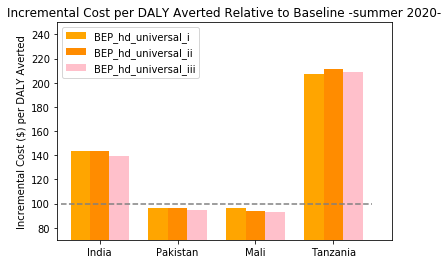

In [32]:
data = master_avg#.where(master_avg['malnourishment_category'] == 'all').dropna()*(-1)

# bar width
barWidth = 0.25

# bar heights

#BEP UNIVERSAL
bep_i = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_i').dropna()*(-1)
#bep_upper_i =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_universal_i').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_i').dropna().values*(-1))
#bep_lower_i =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_i').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_universal_i').dropna().values*(-1))

bep_ii = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_ii').dropna()*(-1)
#bep_upper_ii =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_universal_ii').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_ii').dropna().values*(-1))
#bep_lower_ii =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_ii').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_universal_ii').dropna().values*(-1))

bep_iii = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna()*(-1)
#bep_upper_iii =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1))
#bep_lower_iii =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_universal_iii').dropna().values*(-1))


# bar positions
bep_i_x = np.arange(len(bep_i)) 
bep_ii_x = [x + barWidth for x in bep_i_x]
bep_iii_x = [x + barWidth for x in bep_ii_x]

# plot

plt.bar(bep_i_x, bep_i, label='BEP_hd_universal_i', width=barWidth, color = 'orange') #yerr=[mmn_upper, mmn_lower]
plt.bar(bep_ii_x, bep_ii, label='BEP_hd_universal_ii', width=barWidth, color = 'darkorange') #yerr=[bep_targeted_upper, bep_targeted_lower]
plt.bar(bep_iii_x, bep_iii, label='BEP_hd_universal_iii', width=barWidth, color = 'pink') #yerr=[bep_upper, bep_lower]

plt.legend(loc='upper left')
threshold1 = 100
threshold2 = 50
threshold3 = 25
plt.plot([-0.25,len(mmn)-.25], [threshold1, threshold1],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold3, threshold3],'k--', c='gray')

#
plt.xticks([r + barWidth for r in range(len(mmn))], master_avg['location'].where(master_avg['index'] == 'icer_mmn').dropna())

plt.axis([-0.3 , 4 , 70, 250])

plt.ylabel('Incremental Cost ($) per DALY Averted')
plt.title('Incremental Cost per DALY Averted Relative to Baseline -summer 2020-')

#plt.savefig('fig_ICERS_baseline')

# ICER (scenarios: targeted bep_hd_i, iii, iii)

Text(0.5, 1.0, 'Incremental Cost per DALY Averted Relative to Baseline -summer 2020-')

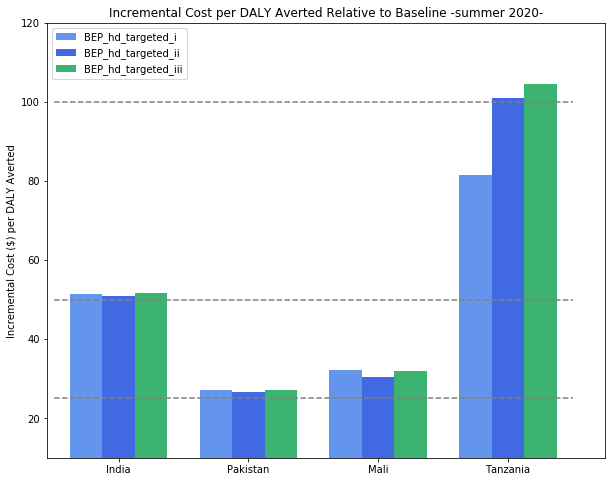

In [33]:
#plt.text to get the actual values plotted on

data = master_avg#.where(master_avg['malnourishment_category'] == 'all').dropna()*(-1)

# bar width
barWidth = 0.25

# bar heights

#BEP targeted
bep_i = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_i').dropna()*(-1)
#bep_upper_i =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_targeted_i').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_i').dropna().values*(-1))
#bep_lower_i =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_i').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_targeted_i').dropna().values*(-1))

bep_ii = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_ii').dropna()*(-1)
#bep_upper_ii =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_targeted_ii').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_ii').dropna().values*(-1))
#bep_lower_ii =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_ii').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_targeted_ii').dropna().values*(-1))

bep_iii = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna()*(-1)
#bep_upper_iii =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1))
#bep_lower_iii =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_targeted_iii').dropna().values*(-1))


# bar positions
bep_i_x = np.arange(len(bep_i)) 
bep_ii_x = [x + barWidth for x in bep_i_x]
bep_iii_x = [x + barWidth for x in bep_ii_x]

# plot
plt.figure(figsize=(10,8))
plt.bar(bep_i_x, bep_i, width=barWidth, label='BEP_hd_targeted_i', color='cornflowerblue' ) #yerr=[mmn_upper, mmn_lower]
plt.bar(bep_ii_x, bep_ii, width=barWidth, label='BEP_hd_targeted_ii', color='royalblue') #yerr=[bep_targeted_upper, bep_targeted_lower]
plt.bar(bep_iii_x, bep_iii, width=barWidth, label='BEP_hd_targeted_iii',color='mediumseagreen') #yerr=[bep_upper, bep_lower]

plt.legend(loc='upper left')
threshold1 = 100
threshold2 = 50
threshold3 = 25
plt.plot([-0.25,len(mmn)-.25], [threshold1, threshold1],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25],  [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25],  [threshold3, threshold3],'k--', c='gray')

plt.xticks([r + barWidth for r in range(len(mmn))], master_avg['location'].where(master_avg['index'] == 'icer_mmn').dropna())

plt.axis([-0.3 , 4 , 10, 120])

plt.ylabel('Incremental Cost ($) per DALY Averted')
plt.title('Incremental Cost per DALY Averted Relative to Baseline -summer 2020-')
#plt.savefig('fig_ICERS_baseline')